In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
from pandas.plotting import boxplot

from sklearn.preprocessing import PowerTransformer


from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso

from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

In [192]:
data = pd.read_csv('train.csv', index_col='Id')
data['SalePrice'] = np.log10(data['SalePrice'] )
data0 = data.copy()

## EDA

In [4]:
data.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold    SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753     5.221979  
std      40.177307    496.123024     2.703626     1.328095     0.173480  
min       0.000000      0.000000     1.000000  2006.000000     4.542825  
25%       0.000000      0.000000     5.000000  2007.000000     5.113860  
50%       0.000000      0.000000     6.000000  2008.000000     5.212188  
75%       0.000000      0.000000     8.000000  2009.000000     5.330414  
max     738.000000  15500.000000    12.000000  2010.000000     5.877947  

[8 rows x 37 columns]

C:\Users\Albert\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


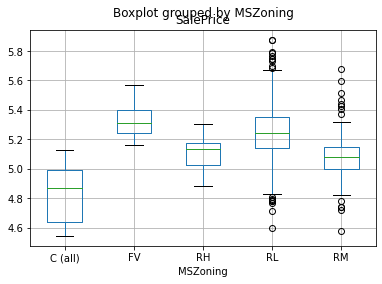

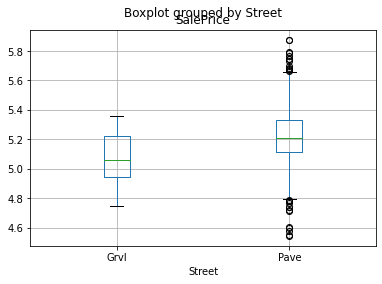

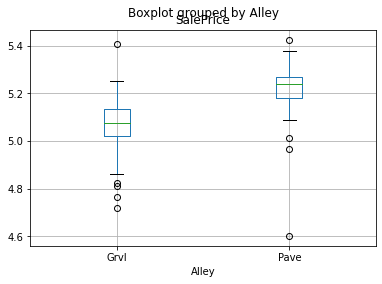

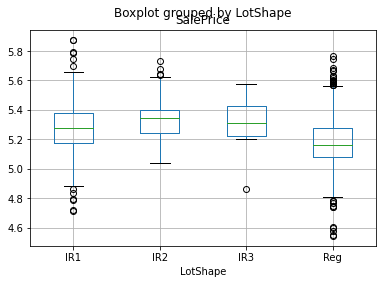

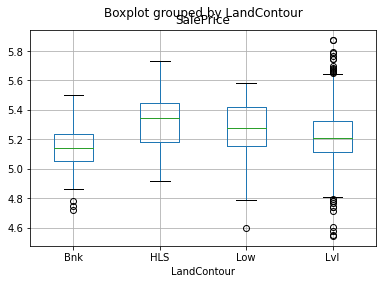

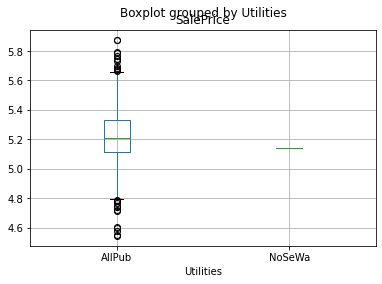

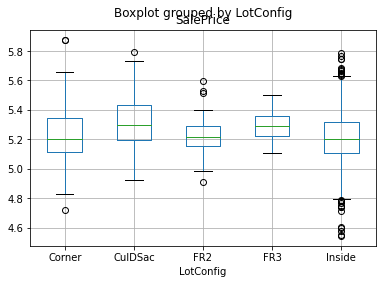

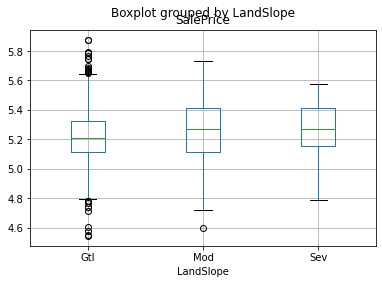

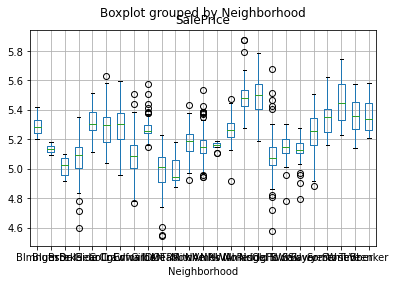

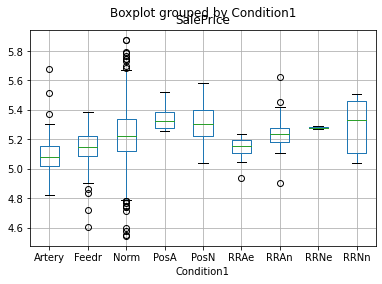

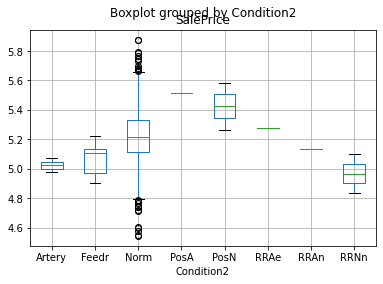

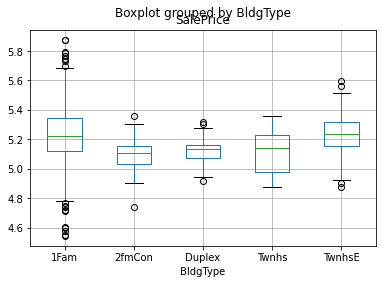

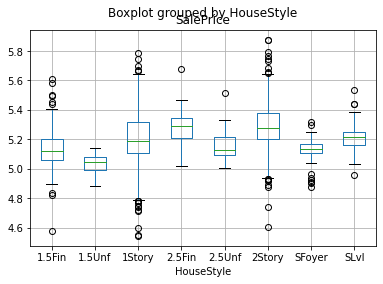

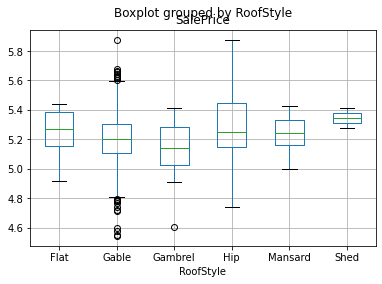

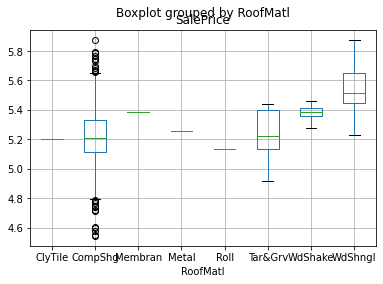

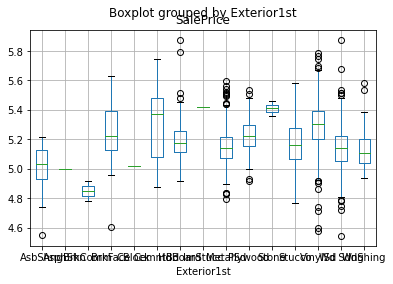

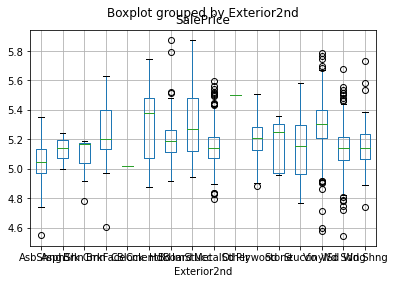

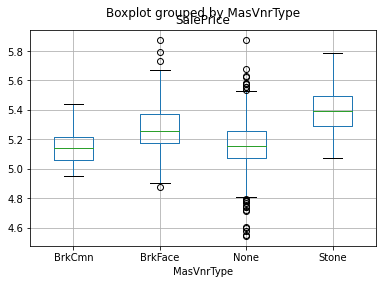

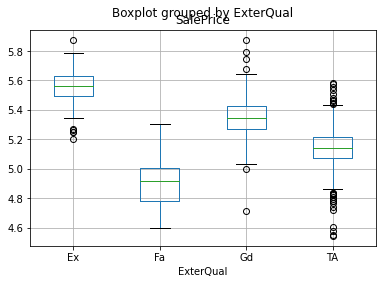

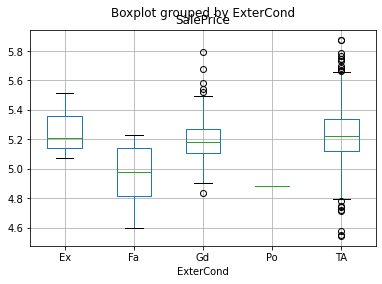

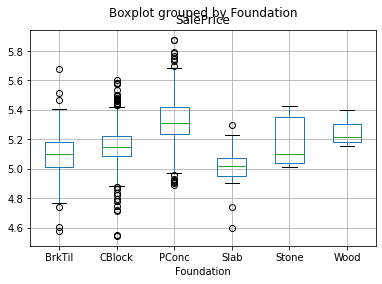

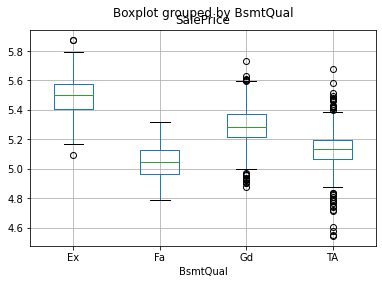

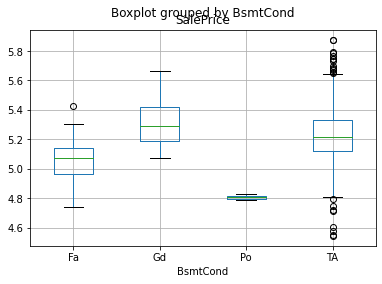

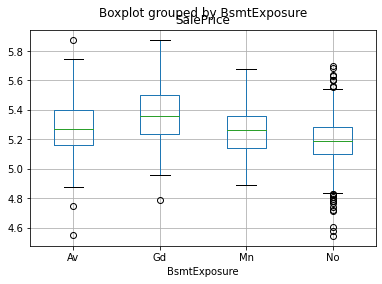

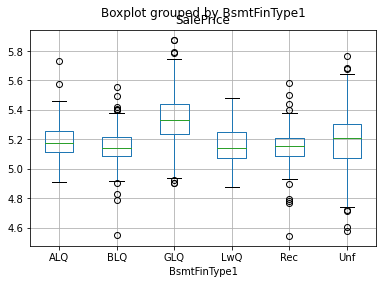

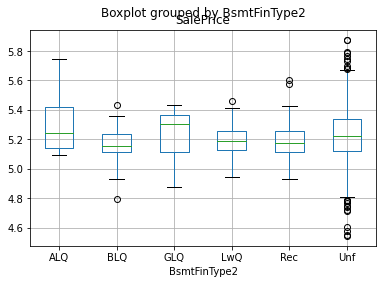

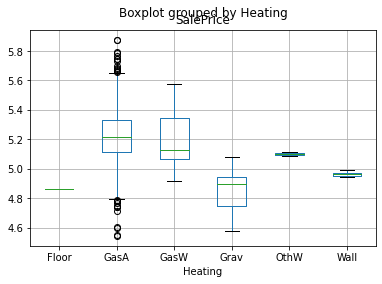

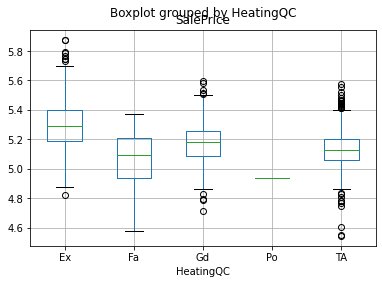

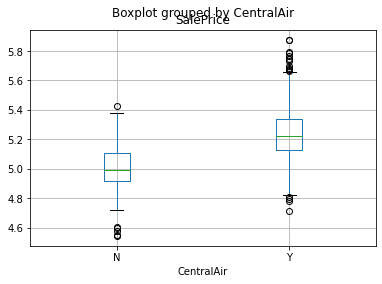

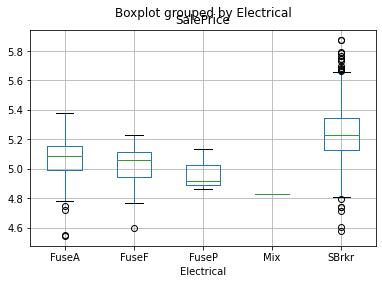

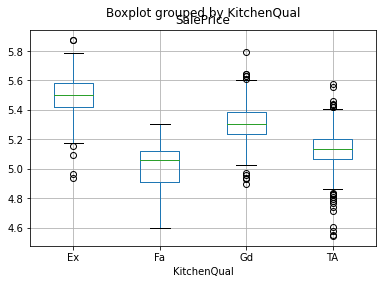

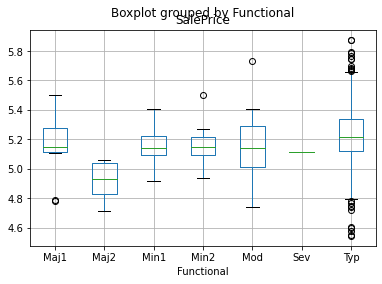

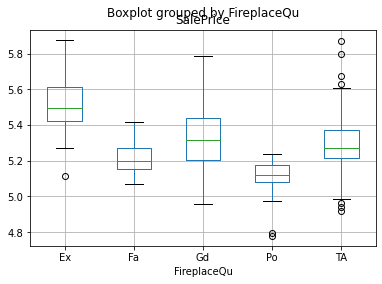

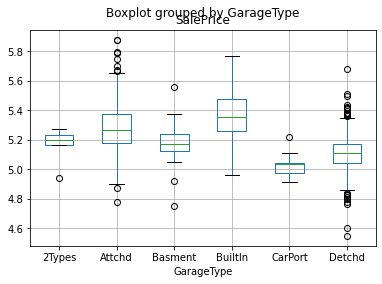

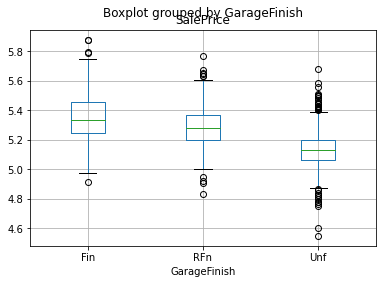

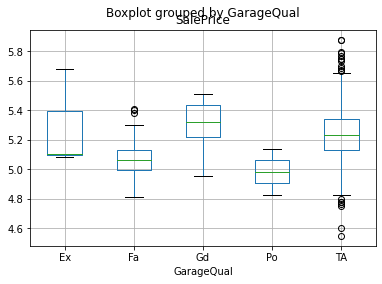

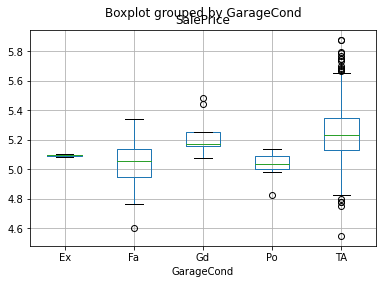

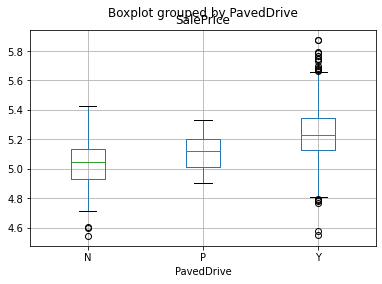

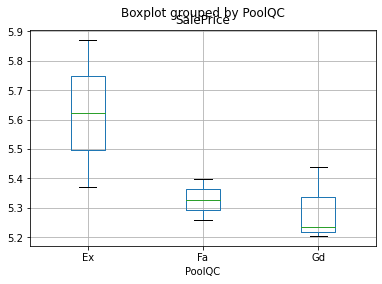

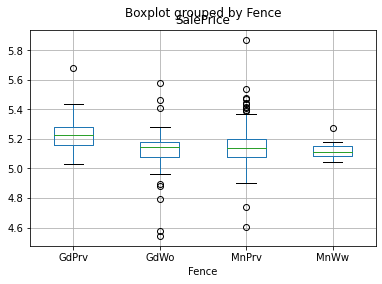

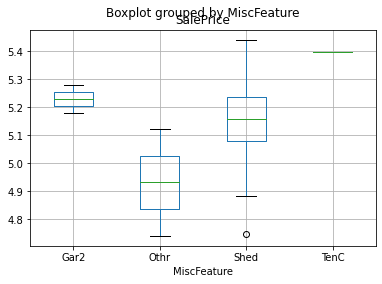

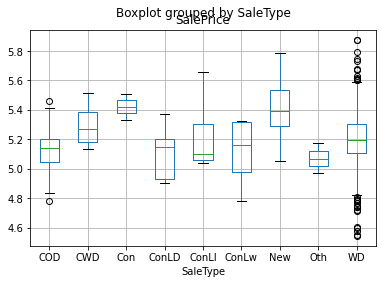

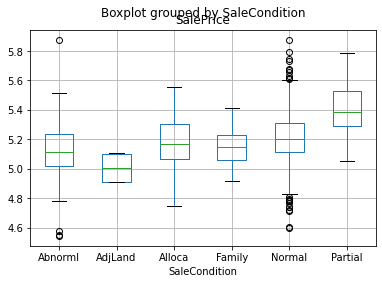

In [5]:
for col in data.columns:
    if data[col].dtypes == 'object':
        data.boxplot('SalePrice', col)

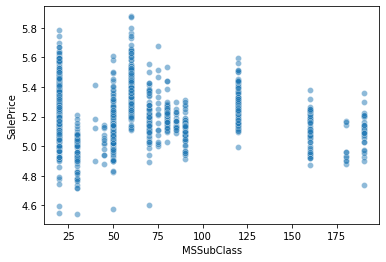

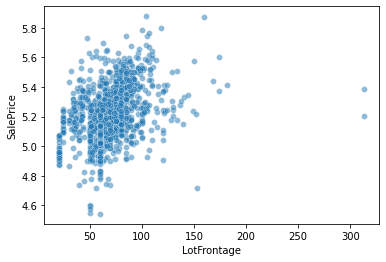

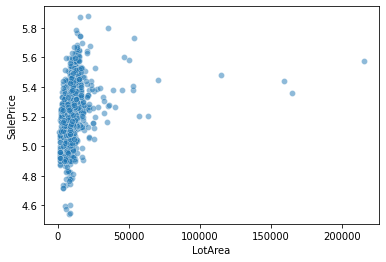

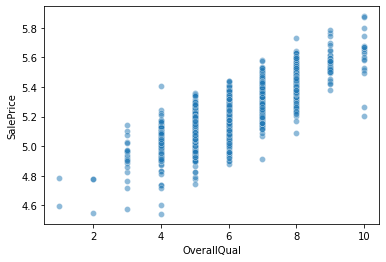

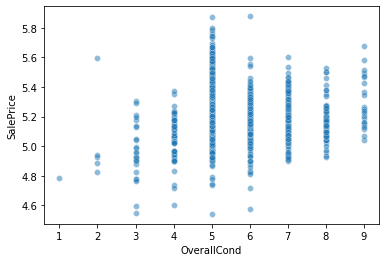

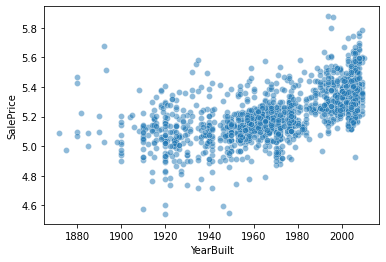

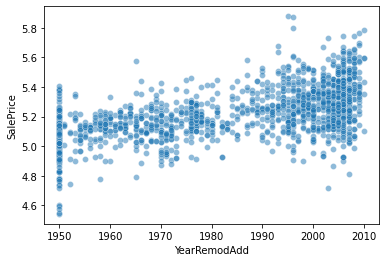

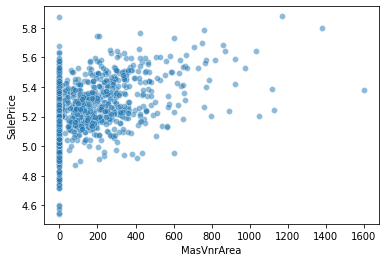

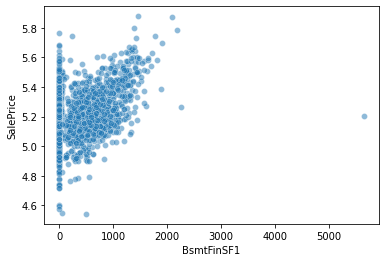

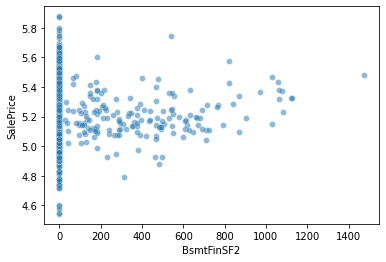

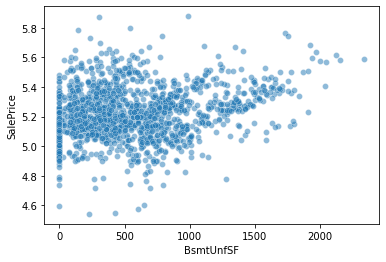

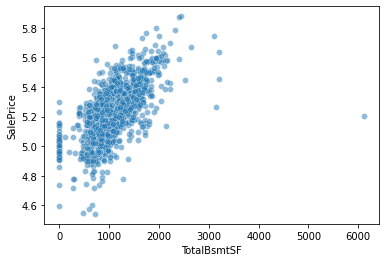

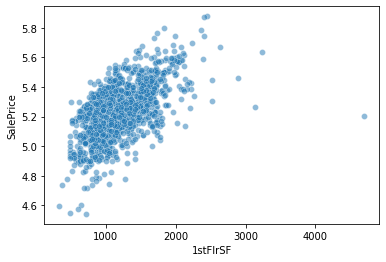

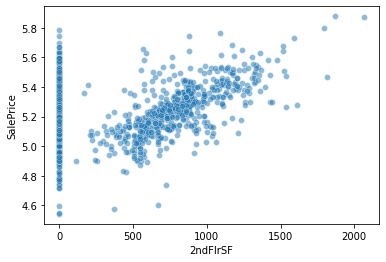

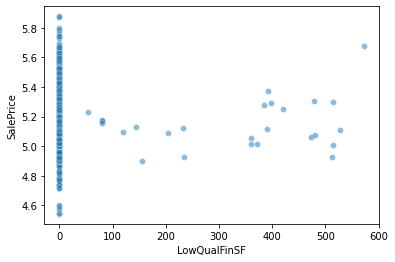

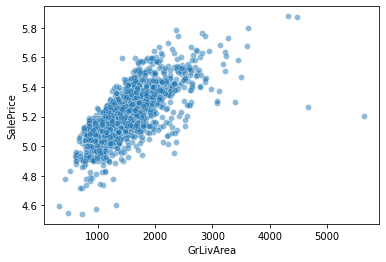

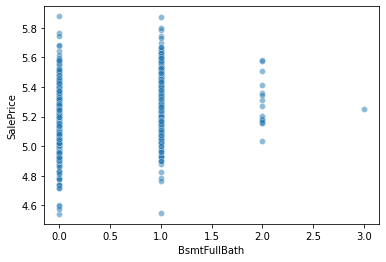

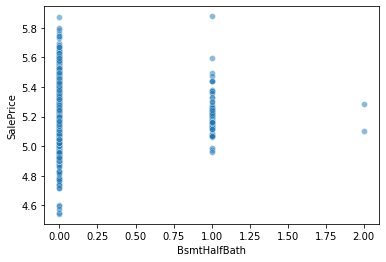

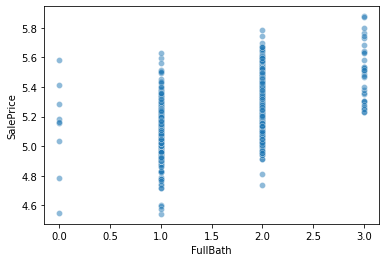

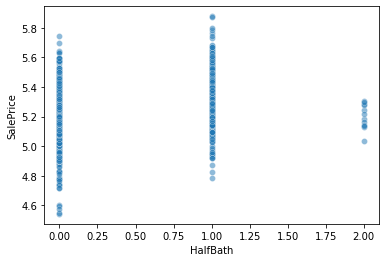

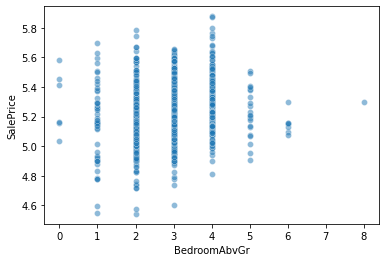

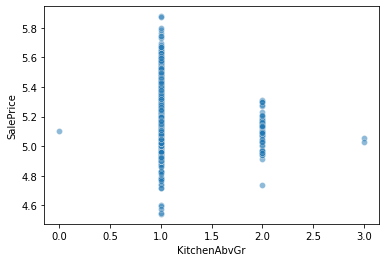

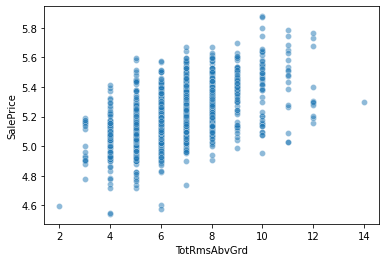

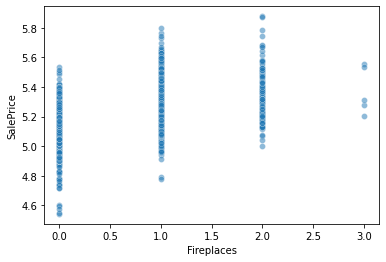

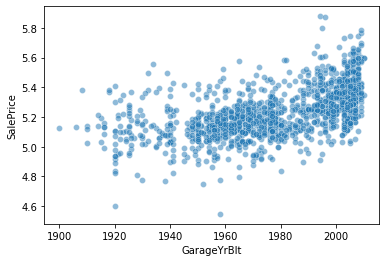

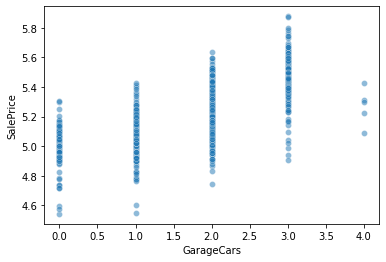

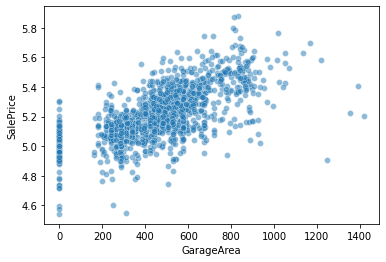

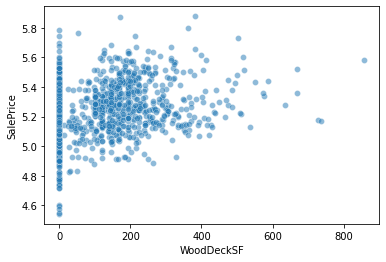

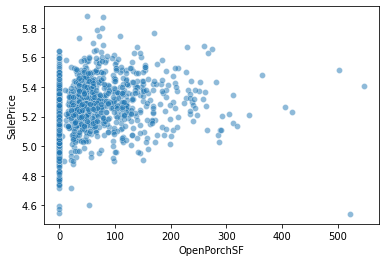

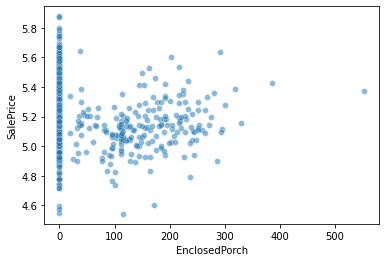

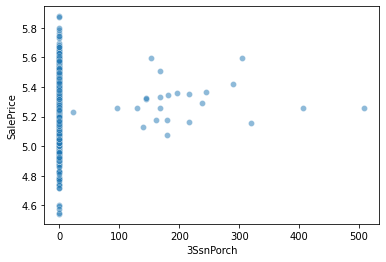

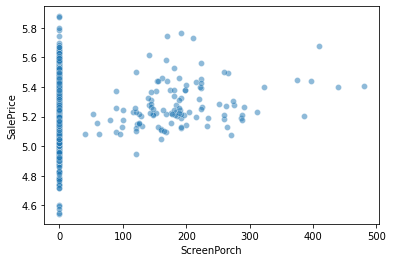

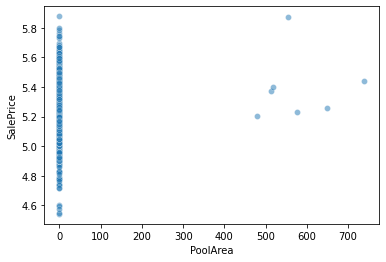

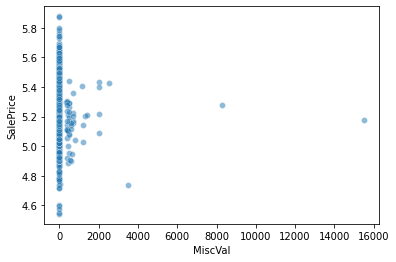

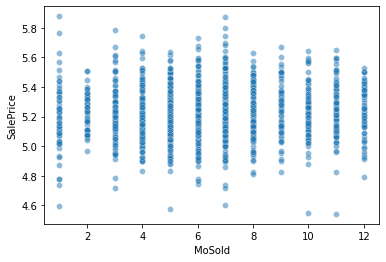

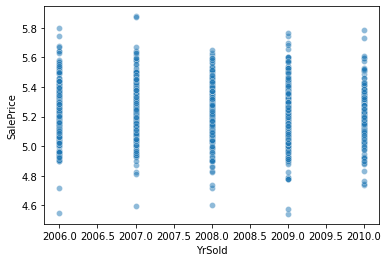

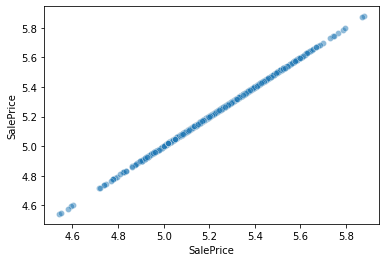

In [6]:
for col in data.columns:
    if data[col].dtypes != 'object':
        sns.scatterplot(x=col, y='SalePrice', data=data, alpha=0.5)
        plt.show()

C:\Users\Albert\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


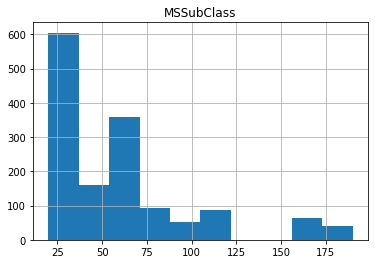

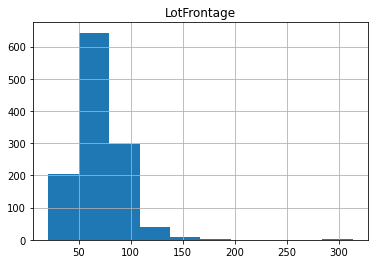

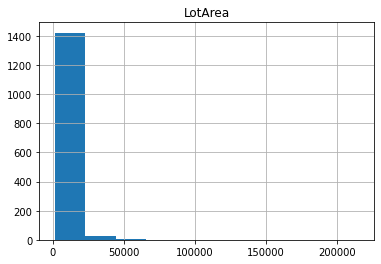

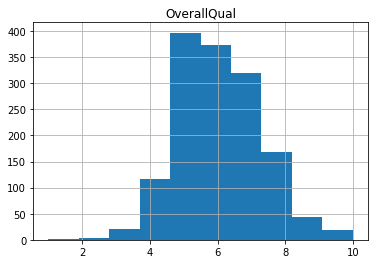

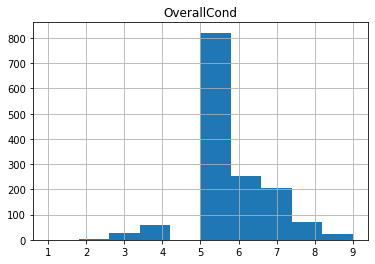

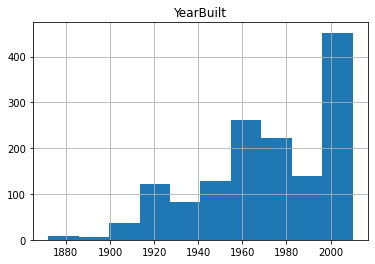

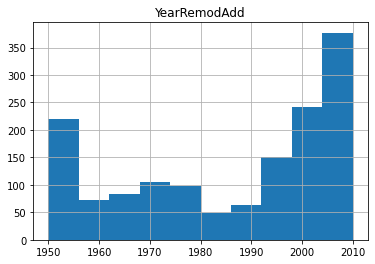

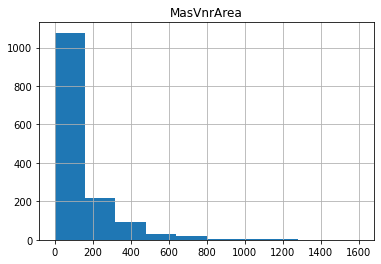

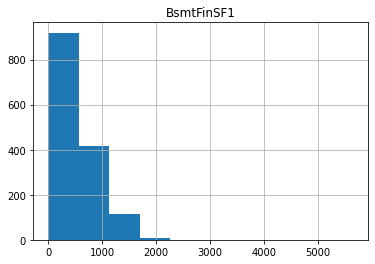

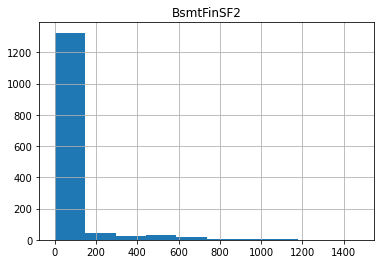

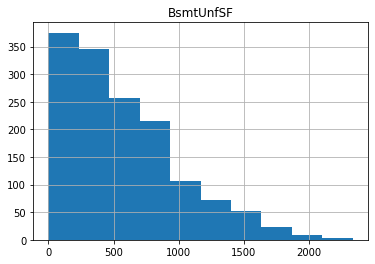

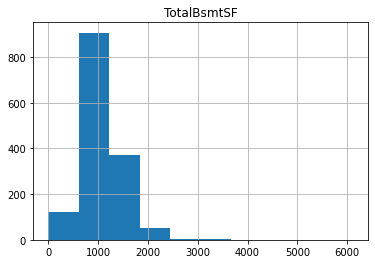

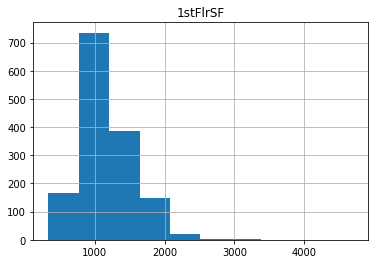

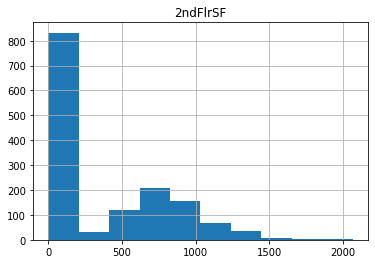

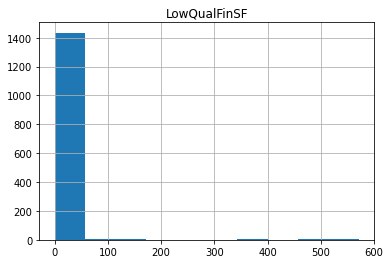

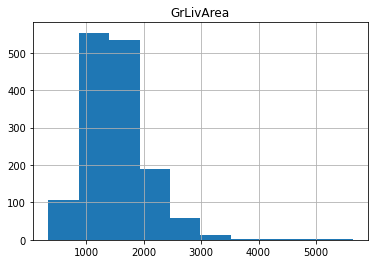

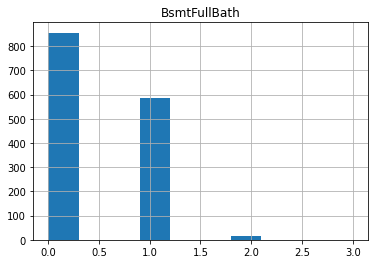

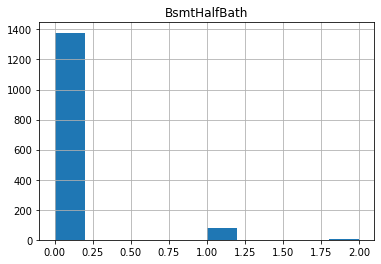

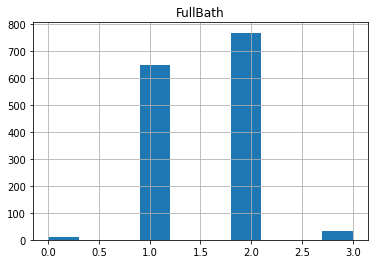

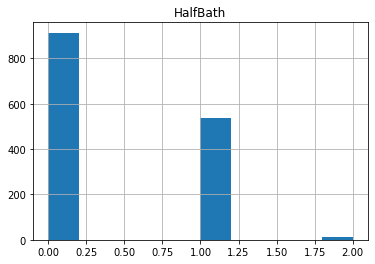

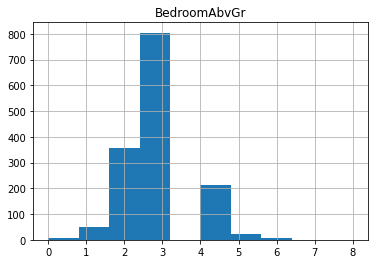

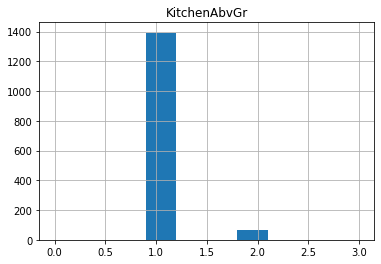

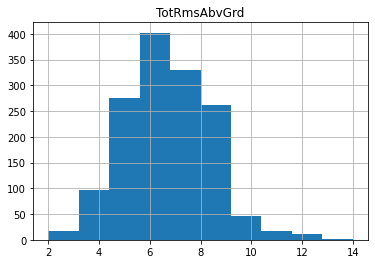

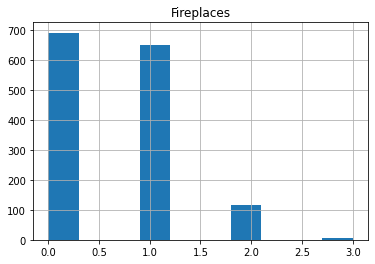

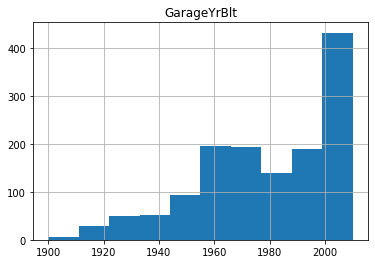

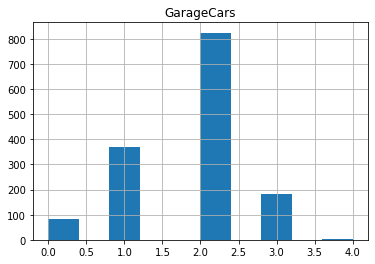

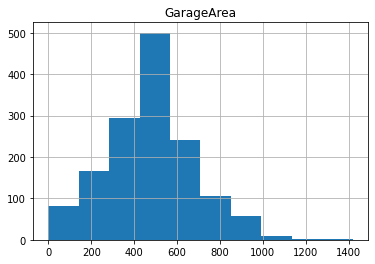

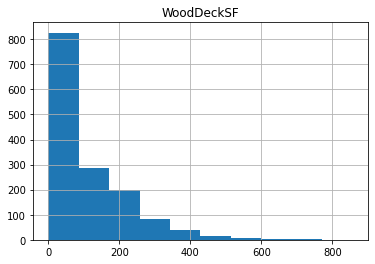

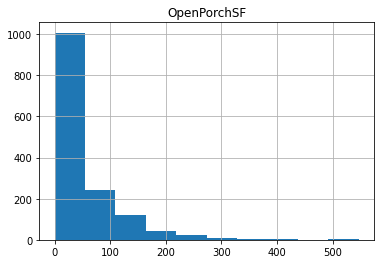

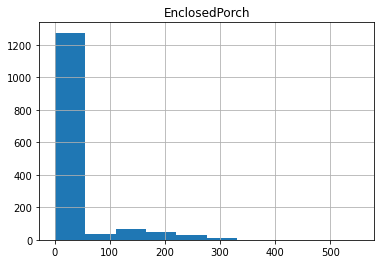

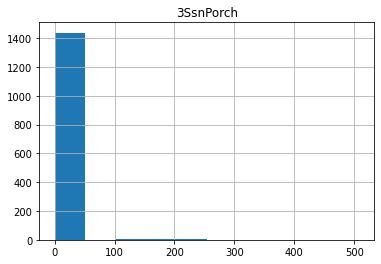

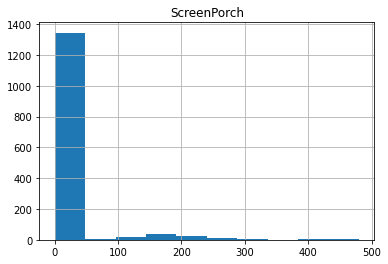

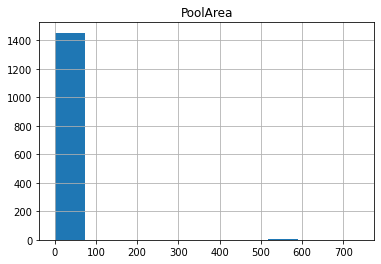

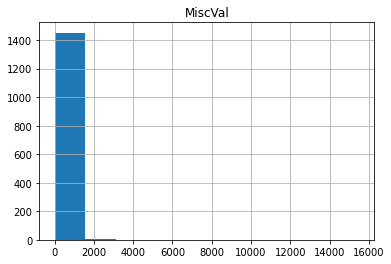

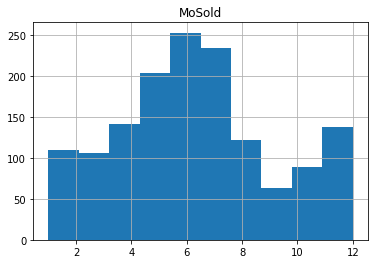

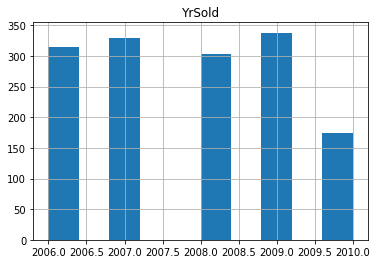

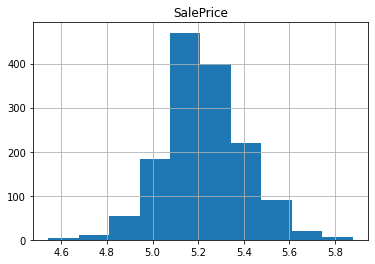

In [7]:
for col in data.columns:
    if data[col].dtypes != 'object':
        data.hist(col)

In [8]:
#TODO colored hystogram

In [266]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

In [267]:
X['MSSubClass'] = X['MSSubClass'].astype('object')

In [268]:
regress_col = X.loc[:, X.dtypes != object].columns

In [269]:
regress_col.shape

(35,)

In [270]:
# X, X_val, y, y_val = train_test_split(X, y, test_size=0.1)

# Scaling, imputing

In [271]:
X = pd.get_dummies(X, drop_first=False)

In [272]:
imputer = SimpleImputer(strategy='median')
X= pd.DataFrame(imputer.fit_transform(X), columns=X.columns, index=X.index)

In [273]:
# X.fillna(0, inplace=True)

In [274]:
transformer = PowerTransformer()
X.loc[:, regress_col] = pd.DataFrame(transformer.fit_transform(X.loc[:, regress_col]), columns=regress_col, index=X.index)

C:\Users\Albert\Anaconda3\lib\site-packages\numpy\core\_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [275]:
scaler = StandardScaler()
X[regress_col] = scaler.fit_transform(X.loc[:, regress_col] )

## Filtering outliers

In [276]:
X2 = X.copy()

In [277]:
X = X2.copy()

In [278]:
X[regress_col]

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                 
1       -0.146062 -0.141171     0.667499    -0.477387   1.151867   
2        0.546852  0.105609    -0.042192     2.011352   0.006695   
3       -0.000631  0.413721     0.667499    -0.477387   1.055357   
4       -0.397299  0.095490     0.667499    -0.477387  -1.629540   
5        0.718695  0.877127     1.350924    -0.477387   1.007861   
...           ...       ...          ...          ...        ...   
1456    -0.295410 -0.266808    -0.042192    -0.477387   0.960863   
1457     0.760913  0.722071    -0.042192     0.440551   0.080711   
1458    -0.097163 -0.010330     0.667499     2.698415  -1.061347   
1459    -0.000631  0.129088    -0.783171     0.440551  -0.823991   
1460     0.324920  0.172505    -0.783171     0.440551  -0.373250   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  \
Id                                                                 ...   
1         0.908055    1.230708    0.797537   -0.359384  -0.887576  ...   
2        -0.621670   -0.818452    1.011471   -0.359384  -0.434388  ...   
3         0.835594    1.193873    0.571325   -0.359384  -0.048083  ...   
4        -0.863478   -0.818452    0.142272   -0.359384   0.183337  ...   
5         0.694898    1.333038    0.750541   -0.359384   0.077485  ...   
...            ...         ...         ...         ...        ...  ...   
1456      0.694898   -0.818452   -1.353159   -0.359384   0.909505  ...   
1457     -0.041619    1.130602    0.869532    2.782472   0.282161  ...   
1458      1.134227   -0.818452    0.261742   -0.359384   0.790731  ...   
1459      0.429676   -0.818452   -0.460226    2.783731  -2.064084  ...   
1460     -1.043880   -0.818452    0.901757    2.783253  -0.945776  ...   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
Id                                                                    
1       0.383899   -0.950337     0.841820      -0.407595  -0.129279   
2      -0.004602    1.213714    -1.071307      -0.407595  -0.129279   
3       0.641990   -0.950337     0.668453      -0.407595  -0.129279   
4       0.786092   -0.950337     0.584540       2.456640  -0.129279   
5       1.583257    1.079695     0.991895      -0.407595  -0.129279   
...          ...         ...          ...            ...        ...   
1456   -0.004602   -0.950337     0.645943      -0.407595  -0.129279   
1457    0.173581    1.260813    -1.071307      -0.407595  -0.129279   
1458   -0.987927   -0.950337     0.834100      -0.407595  -0.129279   
1459   -1.048544    1.274883    -1.071307       2.454153  -0.129279   
1460   -0.868284    1.475782     0.892639      -0.407595  -0.129279   

      ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  
Id                                                         
1       -0.293785 -0.069409 -0.192177 -1.694229  0.140029  
2       -0.293785 -0.069409 -0.192177 -0.444891 -0.613739  
3       -0.293785 -0.069409 -0.192177  0.987490  0.140029  
4       -0.293785 -0.069409 -0.192177 -1.694229 -1.368898  
5       -0.293785 -0.069409 -0.192177  1.963461  0.140029  
...           ...       ...       ...       ...       ...  
1456    -0.293785 -0.069409 -0.192177  0.646025 -0.613739  
1457    -0.293785 -0.069409 -0.192177 -1.694229  1.643312  
1458    -0.293785 -0.069409  5.203549 -0.444891  1.643312  
1459    -0.293785 -0.069409 -0.192177 -0.838080  1.643312  
1460    -0.293785 -0.069409 -0.192177 -0.068307  0.140029  

[1460 rows x 35 columns]

In [279]:
outliers = X[(abs(X[regress_col]) > 5).any(axis=1)].index

In [280]:
X.drop(outliers, axis=0, inplace=True)
y.drop(outliers, inplace=True)
outliers

Int64Index([   6,    8,   17,   18,   49,   52,   56,   85,   89,   96,
            ...
            1299, 1329, 1347, 1350, 1365, 1387, 1424, 1438, 1441, 1458],
           dtype='int64', name='Id', length=110)

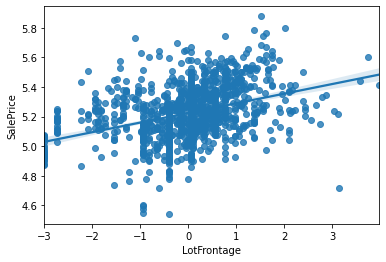

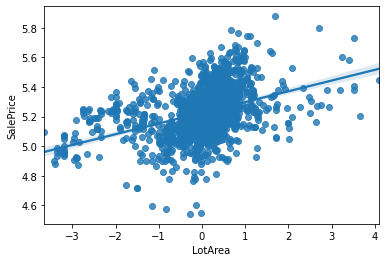

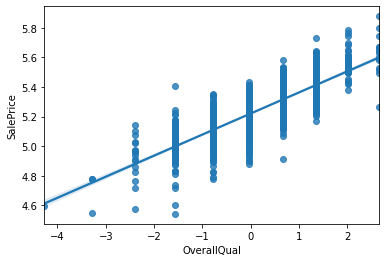

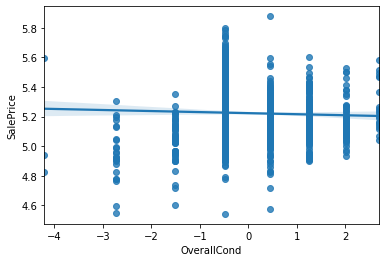

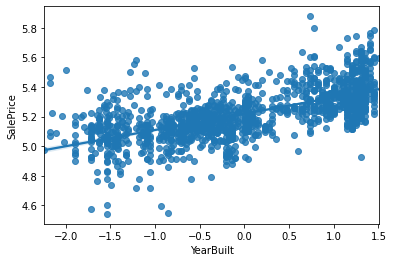

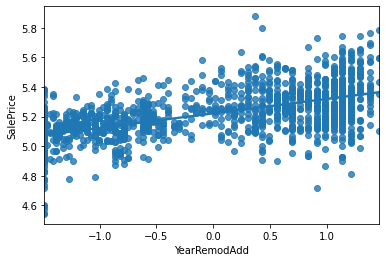

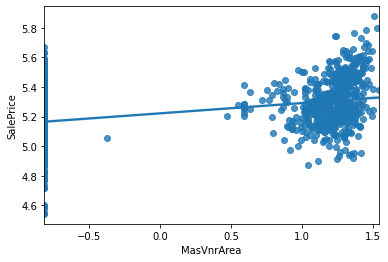

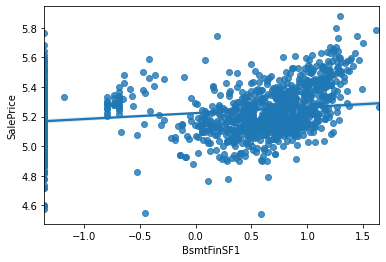

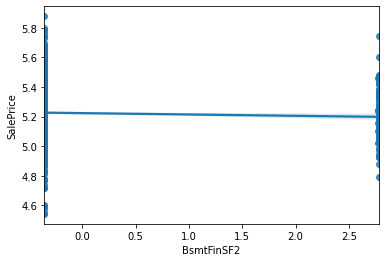

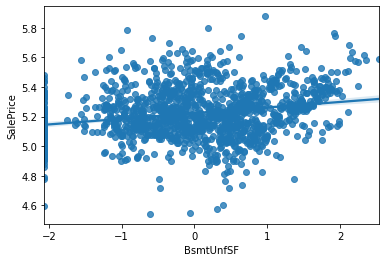

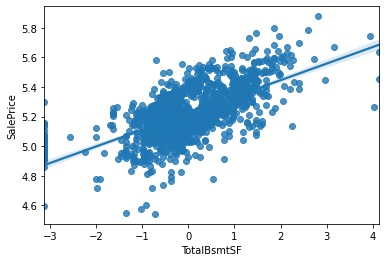

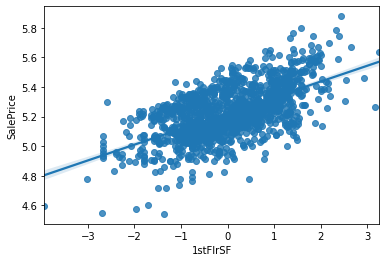

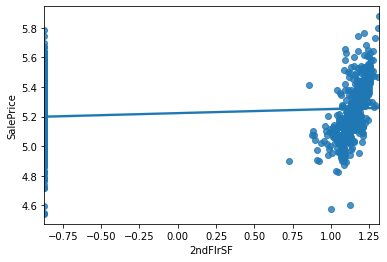

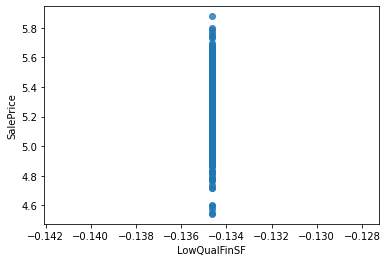

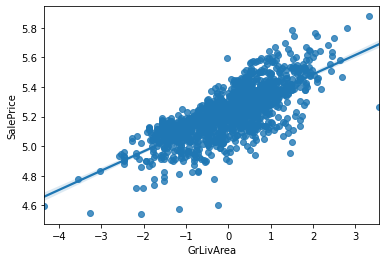

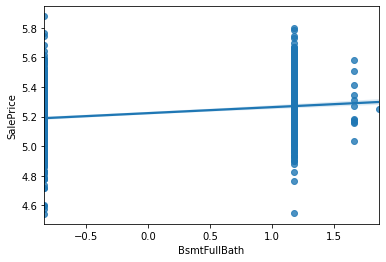

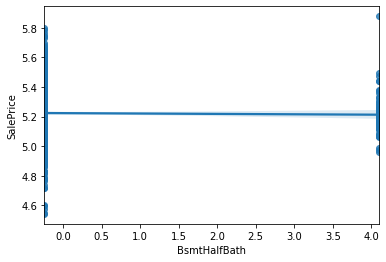

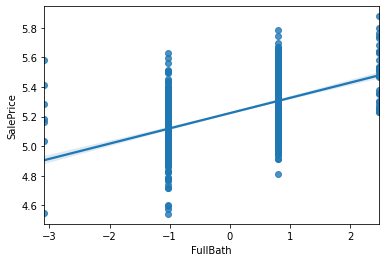

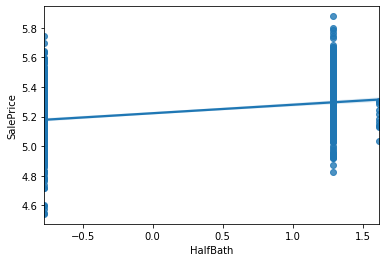

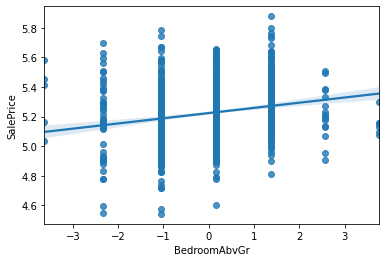

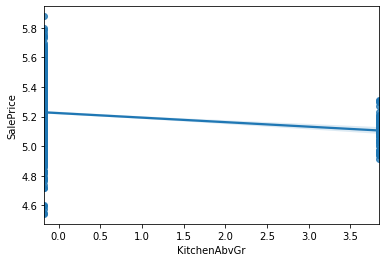

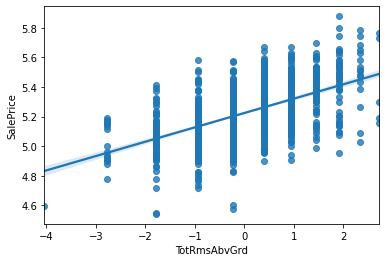

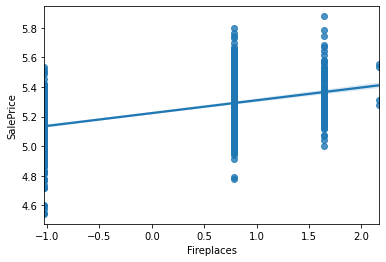

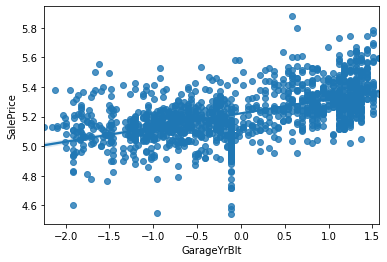

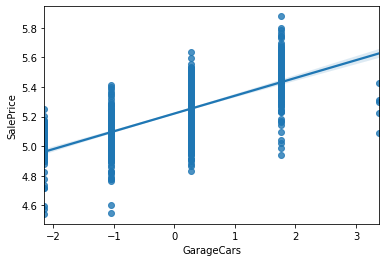

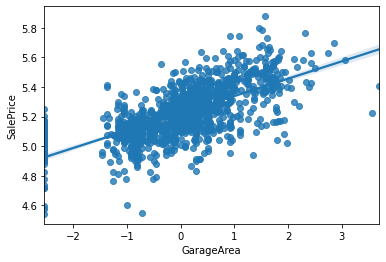

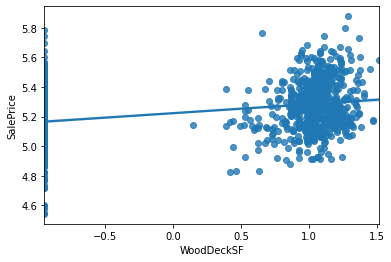

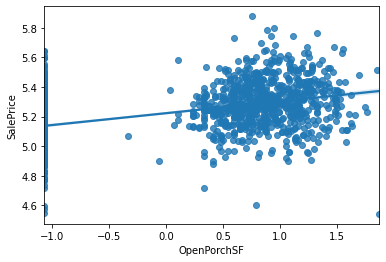

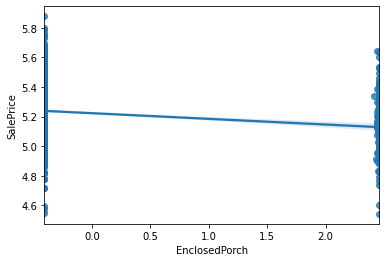

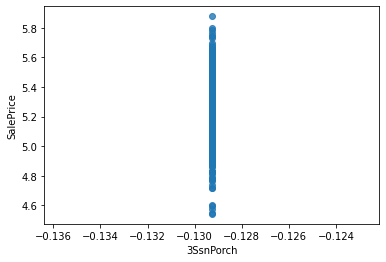

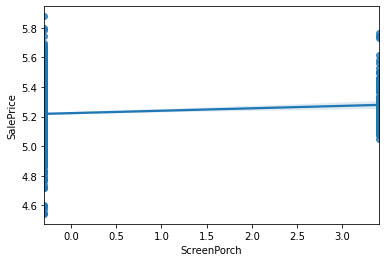

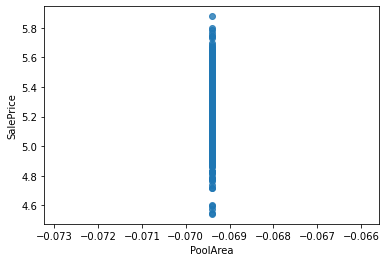

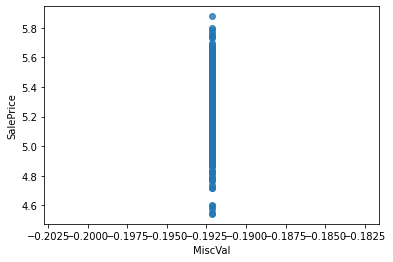

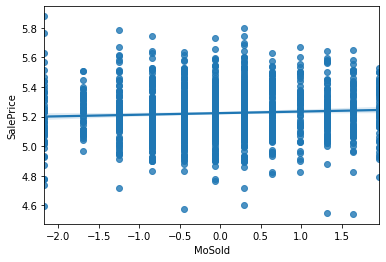

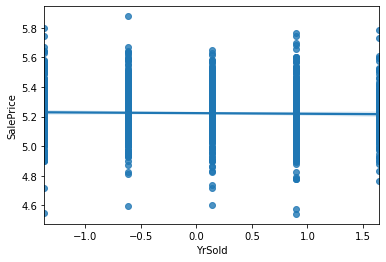

In [281]:
for col in regress_col:
    sns.regplot(x=X[col], y=y)
    plt.show()

## Cook distance

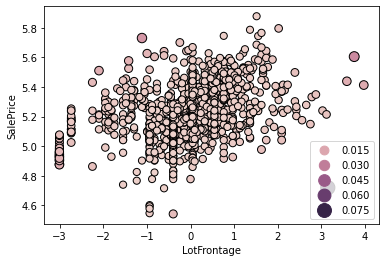

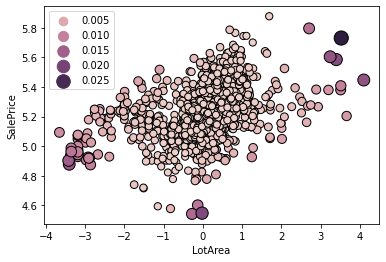

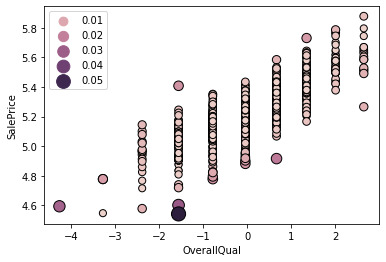

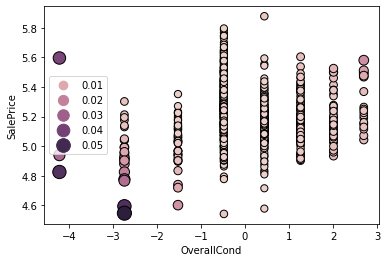

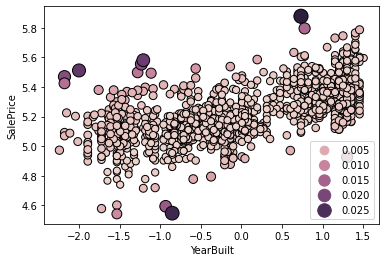

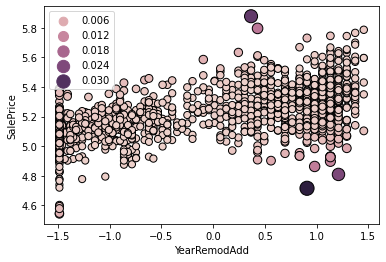

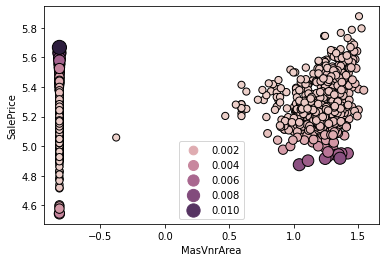

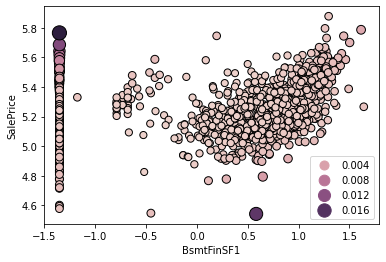

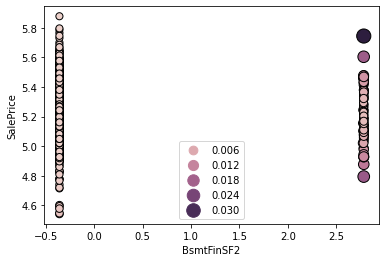

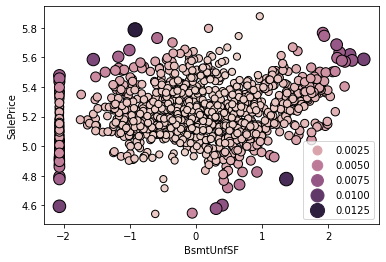

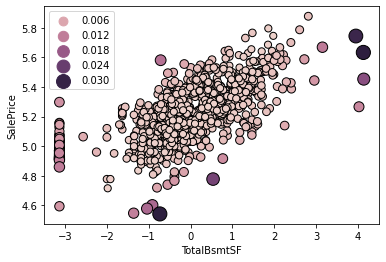

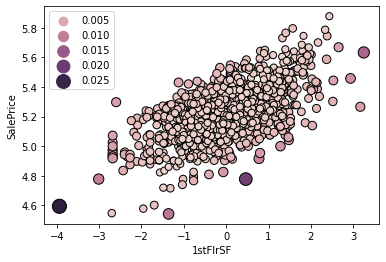

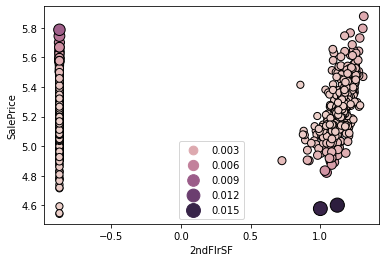

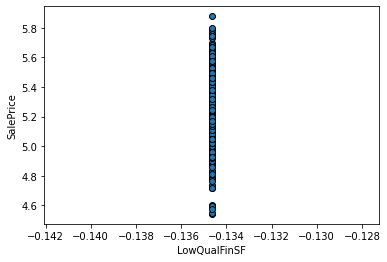

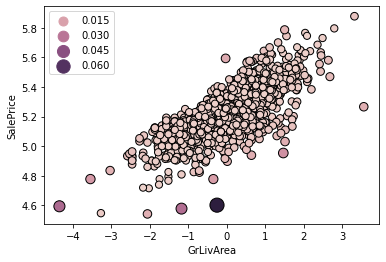

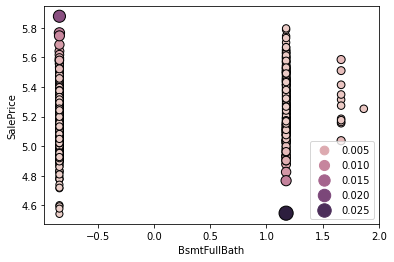

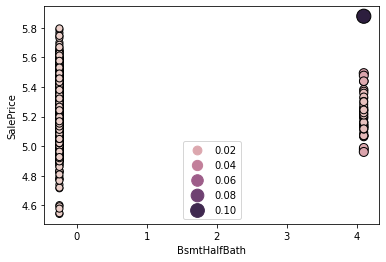

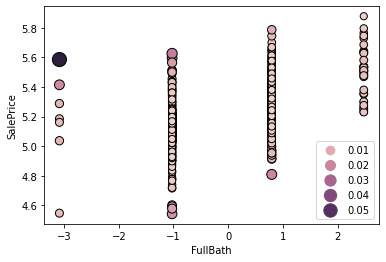

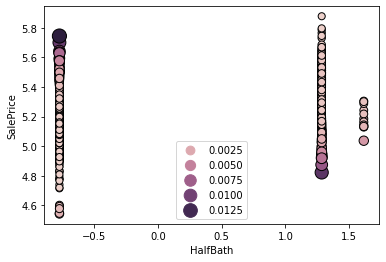

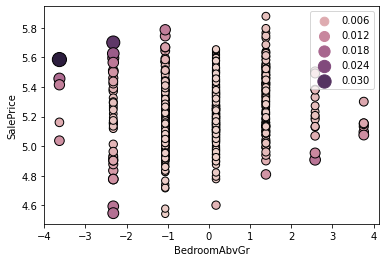

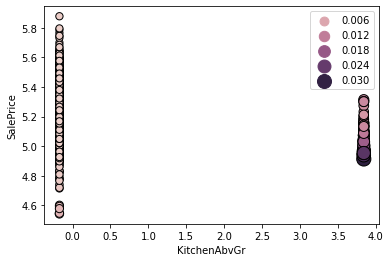

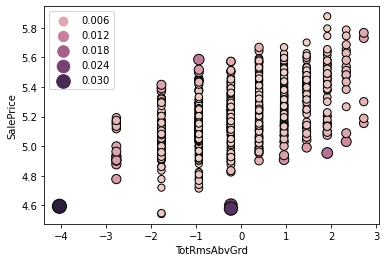

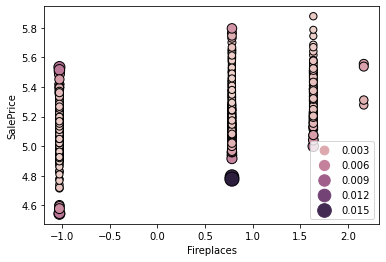

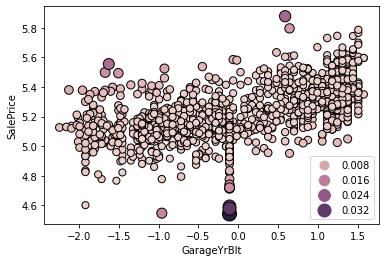

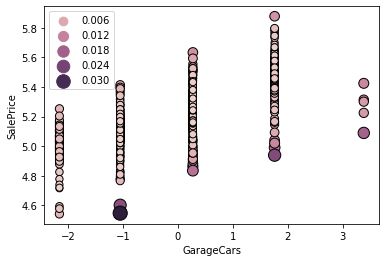

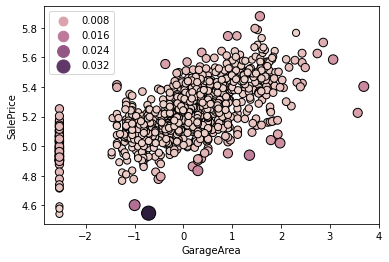

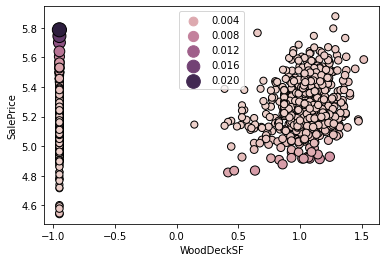

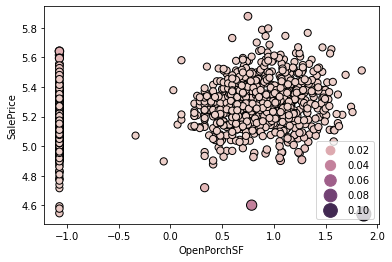

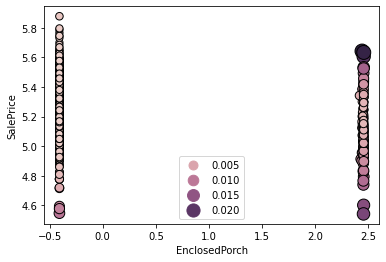

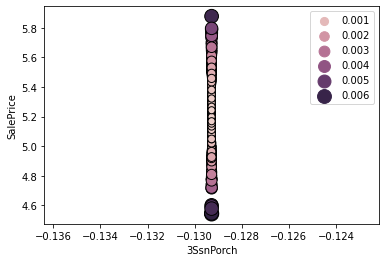

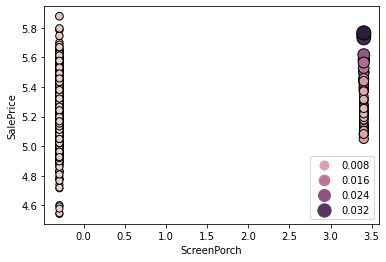

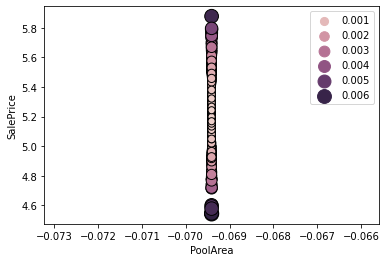

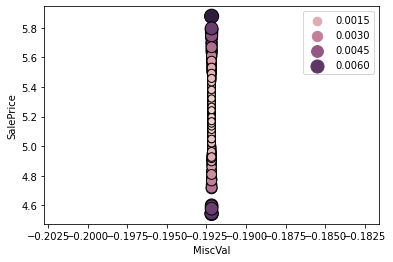

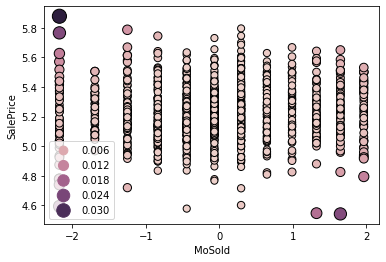

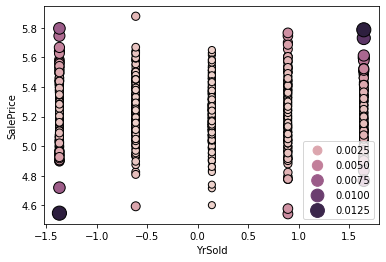

In [282]:
for col in regress_col:
    model = ols(formula=f'Q("{col}") ~ SalePrice', data=X.join(y)).fit()
    distance, p_value = OLSInfluence(model).cooks_distance

# scatter plot - x axis (independent variable height), y-axis (dependent variable weight), size and color of the marks according to its cook's distance
    sns.scatterplot(x=X[col], y=y, hue=distance, size=distance, sizes=(50, 200), edgecolor='black', linewidth=1)
    plt.show()

In [283]:
np.sort(p_value)


array([0.98683034, 0.98688301, 0.98925697, ..., 0.99999224, 0.99999224,
       0.99999224])

In [287]:
outliers_mask = p_value < 0.60
outliers_mask.sum()

0

In [288]:
outliers_mask = p_value < 0.60
outliers = distance[outliers_mask].index
X.drop(index=outliers, axis=0, inplace=True)
y.drop(index=outliers, inplace=True)
outliers

Int64Index([], dtype='int64', name='Id')

## Ridge regression not needed

In [18]:
reg = Ridge(alpha=100)
reg.fit(X, y)

Ridge(alpha=100)

In [19]:
large_error = abs(reg.predict(X) - y).sort_values(ascending=False)
large_error[:40]

Id
31      0.314374
463     0.269867
969     0.265013
1325    0.253093
917     0.236383
813     0.209270
411     0.198860
971     0.198367
1433    0.184799
589     0.180646
711     0.166431
1454    0.162581
875     0.158972
629     0.149976
715     0.138297
667     0.130528
775     0.130040
729     0.129348
561     0.128506
143     0.127949
682     0.127072
1063    0.125044
219     0.123833
67      0.117708
278     0.116279
329     0.115249
804     0.115235
432     0.112247
1280    0.109961
379     0.107170
670     0.107063
582     0.106698
663     0.106557
739     0.105159
865     0.103713
886     0.103459
1047    0.102516
1245    0.101835
1338    0.100205
1384    0.098404
Name: SalePrice, dtype: float64

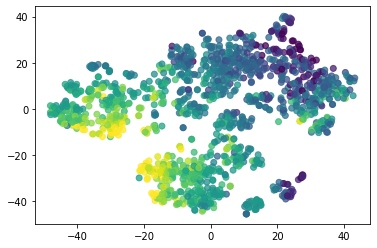

In [289]:
ym = y.mean()
ys = y.std()
h = ym + 2*ys
l = ym -2*ys
y_s = [max(min(el, h), l) for el in y]

tsne = TSNE(learning_rate=50, n_jobs=-1)
tsne_features = tsne.fit_transform(X)
xs = tsne_features[:,0]
ys = tsne_features[:,1]
plt.scatter(xs, ys, c=y_s, alpha=0.75)

## Exploring intrinsic dimension

<BarContainer object of 200 artists>

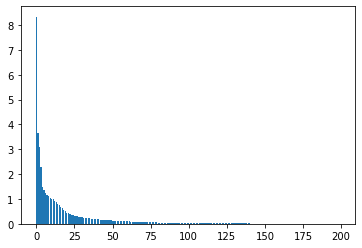

In [219]:
pca = PCA()
pca.fit(X)
intrinsic_dim = np.argmin(pca.explained_variance_ratio_.cumsum() <= 0.999)

pca = PCA(n_components=intrinsic_dim)
pca.fit(X)
plt.bar(range(intrinsic_dim), pca.explained_variance_)

In [220]:
reg = Lasso(alpha=1e-6, max_iter=100000)
reg.fit(X, y)
X.loc[:, reg.coef_ == 0].columns

Index(['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal', 'MSSubClass_60',
       'MSSubClass_90', 'MSZoning_RH', 'Utilities_NoSeWa', 'LotConfig_Inside',
       'LandSlope_Gtl', 'Neighborhood_Blmngtn', 'Condition1_RRAn',
       'Condition2_Feedr', 'Condition2_RRAe', 'BldgType_1Fam',
       'HouseStyle_SLvl', 'RoofMatl_ClyTile', 'RoofMatl_Metal',
       'Exterior1st_CBlock', 'Exterior1st_HdBoard', 'Exterior2nd_CBlock',
       'Exterior2nd_HdBoard', 'ExterCond_Po', 'BsmtQual_Fa', 'BsmtCond_Gd',
       'BsmtFinType1_ALQ', 'BsmtFinType2_BLQ', 'HeatingQC_Gd',
       'Functional_Min2', 'GarageFinish_RFn', 'GarageQual_TA', 'GarageCond_TA',
       'PavedDrive_N', 'PoolQC_Ex', 'PoolQC_Fa', 'PoolQC_Gd',
       'MiscFeature_Gar2', 'MiscFeature_Othr', 'MiscFeature_TenC',
       'SaleType_ConLI'],
      dtype='object')

## Filtering features

In [296]:
from boruta import BorutaPy

In [297]:
feat_selector = BorutaPy(reg2, verbose=2, random_state=1, perc=0.1, max_iter=50)
feat_selector.fit(np.array(X), y)
feat_selector.ranking_

Iteration: 	1 / 50
Confirmed: 	0
Tentative: 	302
Rejected: 	0
Iteration: 	2 / 50
Confirmed: 	0
Tentative: 	302
Rejected: 	0
Iteration: 	3 / 50
Confirmed: 	0
Tentative: 	302
Rejected: 	0
Iteration: 	4 / 50
Confirmed: 	0
Tentative: 	302
Rejected: 	0
Iteration: 	5 / 50
Confirmed: 	0
Tentative: 	302
Rejected: 	0
Iteration: 	6 / 50
Confirmed: 	0
Tentative: 	302
Rejected: 	0
Iteration: 	7 / 50
Confirmed: 	0
Tentative: 	302
Rejected: 	0
Iteration: 	8 / 50
Confirmed: 	212
Tentative: 	62
Rejected: 	28
Iteration: 	9 / 50
Confirmed: 	212
Tentative: 	62
Rejected: 	28
Iteration: 	10 / 50
Confirmed: 	212
Tentative: 	62
Rejected: 	28
Iteration: 	11 / 50
Confirmed: 	212
Tentative: 	62
Rejected: 	28
Iteration: 	12 / 50
Confirmed: 	222
Tentative: 	52
Rejected: 	28
Iteration: 	13 / 50
Confirmed: 	222
Tentative: 	52
Rejected: 	28
Iteration: 	14 / 50
Confirmed: 	222
Tentative: 	46
Rejected: 	34
Iteration: 	15 / 50
Confirmed: 	222
Tentative: 	46
Rejected: 	34
Iteration: 	16 / 50
Confirmed: 	224
Tentative: 	

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 44,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 44,  1, 44, 44,  1,
        1,  1,  1, 27,  2,  1,  1,  1,  1,  1,  2,  1,  1,  1,  2,  1,  1,
        1,  1,  1,  1, 44, 44,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 44,
       22,  1,  1,  1,  2,  1,  1,  1,  1,  1, 23,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  5,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, 44, 18, 20, 16,  1, 19,  1, 44, 44, 27,
        1,  1,  1,  1,  1,  1,  2,  1, 30,  1,  1,  1,  1,  1,  1,  1,  1,
       10, 23, 44,  1, 10, 44, 44,  1,  2,  1,  1, 44,  1,  1, 44,  1,  1,
       44,  1,  1, 20,  1,  1,  1,  1,  1,  2,  1,  1, 27,  1,  1,  3,  1,
       44,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, 44,  1,  1,  1,  1,  1,  2,  2,  1,  1,  1,  1,  1,  1, 10,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1, 16,
        1,  1,  1, 44, 14

In [258]:
feat_selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True, False, False,  True,  True,  True, False,  True, False,
        True, False, False, False, False,  True,  True,  True,  True,
        True, False, False,  True,  True,  True, False, False,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
       False,  True,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True, False, False,  True,  True,  True,  True, False,  True,
       False, False, False, False,  True,  True, False,  True, False,
       False, False,  True, False,  True, False, False,  True, False,
        True, False,

In [25]:
# X_full = pd.concat((X, X_val)).copy()
# y_full = pd.concat((y, y_val)).copy()

In [299]:
X = X.loc[:, feat_selector.support_] 

In [249]:
## Decorrelation isn't needed, because I'll use Decision tree

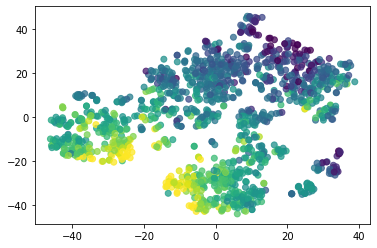

In [301]:
ym = y.mean()
ys = y.std()
h = ym + 2*ys
l = ym -2*ys
y_s = [max(min(el, h), l) for el in y]

tsne = TSNE(learning_rate=50, n_jobs=-1)
tsne_features = tsne.fit_transform(X)
xs = tsne_features[:,0]
ys = tsne_features[:,1]
plt.scatter(xs, ys, c=y_s, alpha=0.75)

## Transforming test data

In [237]:
test = pd.read_csv('test.csv', index_col='Id')
test0 = pd.read_csv('test.csv', index_col='Id')
test['MSSubClass'] = test['MSSubClass'].astype(object)

In [238]:
test.columns[test.isna().any().values]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

In [239]:
test = pd.get_dummies(test, drop_first=False)
X, test = X.align(test, join='left', axis=1)

In [240]:
test= pd.DataFrame(imputer.transform(test), columns=test.columns, index=test.index)

In [241]:
test[regress_col] = pd.DataFrame(transformer.transform(test[regress_col]), columns=regress_col, index=test.index)

In [242]:
test[regress_col] = pd.DataFrame(scaler.transform(test[regress_col]), columns=regress_col, index=test.index)

In [243]:
test

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                 
1461     0.546852  0.477105    -0.783171     0.440551  -0.500661   
1462     0.590269  0.878090    -0.042192     0.440551  -0.592683   
1463     0.279518  0.817091    -0.783171    -0.477387   0.868345   
1464     0.459068  0.180493    -0.042192     0.440551   0.914360   
1465    -1.355641 -1.143948     1.350924    -0.477387   0.645435   
...           ...       ...          ...          ...        ...   
2915    -3.005196 -2.921454    -1.562455     1.263440  -0.206089   
2916    -3.005196 -2.961881    -1.562455    -0.477387  -0.206089   
2917     3.352887  1.544205    -0.783171     1.263440  -0.531666   
2918    -0.295410  0.268558    -0.783171    -0.477387   0.645435   
2919     0.279518  0.111051     0.667499    -0.477387   0.689077   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  \
Id                                                                 ...   
1461     -1.175682   -0.818452    0.549525    2.782196  -0.475482  ...   
1462     -1.267783    1.109742    0.972297   -0.359384  -0.114082  ...   
1463      0.559661   -0.818452    0.870352   -0.359384  -0.941518  ...   
1464      0.559661    0.664700    0.698615   -0.359384  -0.322538  ...   
1465      0.184672   -0.818452    0.239162   -0.359384   1.005697  ...   
...            ...         ...         ...         ...        ...  ...   
2915     -0.863478   -0.818452   -1.353159   -0.359384   0.195686  ...   
2916     -0.863478   -0.818452    0.217758   -0.359384  -0.405686  ...   
2917      0.429676   -0.818452    1.168342   -0.359384  -2.064084  ...   
2918      0.184672   -0.818452    0.367634   -0.359384   0.254384  ...   
2919      0.304743    1.079053    0.842834   -0.359384  -0.573843  ...   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
Id                                                              
1461             0.0           0.0           0.0          1.0   
1462             0.0           0.0           0.0          1.0   
1463             0.0           0.0           0.0          1.0   
1464             0.0           0.0           0.0          1.0   
1465             0.0           0.0           0.0          1.0   
...              ...           ...           ...          ...   
2915             0.0           0.0           0.0          1.0   
2916             0.0           0.0           0.0          1.0   
2917             0.0           0.0           0.0          1.0   
2918             0.0           0.0           0.0          1.0   
2919             0.0           0.0           0.0          1.0   

      SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
Id                                                                         
1461                    0.0                    0.0                   0.0   
1462                    0.0                    0.0                   0.0   
1463                    0.0                    0.0                   0.0   
1464                    0.0                    0.0                   0.0   
1465                    0.0                    0.0                   0.0   
...                     ...                    ...                   ...   
2915                    0.0                    0.0                   0.0   
2916                    1.0                    0.0                   0.0   
2917                    1.0                    0.0                   0.0   
2918                    0.0                    0.0                   0.0   
2919                    0.0                    0.0                   0.0   

      SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
Id                                                                       
1461                   0.0                   1.0                    0.0  
1462                   0.0                   1.0                    0.0  
1463                   0.0 

In [300]:
# test = feat_selector.transform(np.array(test))
test_filtered = test.loc[:, feat_selector.support_] 
# test_filtered.drop(~feat_selector.support_, axis=1, inplace=True)
test_filtered

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                 
1461     0.546852  0.477105    -0.783171     0.440551  -0.500661   
1462     0.590269  0.878090    -0.042192     0.440551  -0.592683   
1463     0.279518  0.817091    -0.783171    -0.477387   0.868345   
1464     0.459068  0.180493    -0.042192     0.440551   0.914360   
1465    -1.355641 -1.143948     1.350924    -0.477387   0.645435   
...           ...       ...          ...          ...        ...   
2915    -3.005196 -2.921454    -1.562455     1.263440  -0.206089   
2916    -3.005196 -2.961881    -1.562455    -0.477387  -0.206089   
2917     3.352887  1.544205    -0.783171     1.263440  -0.531666   
2918    -0.295410  0.268558    -0.783171    -0.477387   0.645435   
2919     0.279518  0.111051     0.667499    -0.477387   0.689077   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  \
Id                                                                 ...   
1461     -1.175682   -0.818452    0.549525    2.782196  -0.475482  ...   
1462     -1.267783    1.109742    0.972297   -0.359384  -0.114082  ...   
1463      0.559661   -0.818452    0.870352   -0.359384  -0.941518  ...   
1464      0.559661    0.664700    0.698615   -0.359384  -0.322538  ...   
1465      0.184672   -0.818452    0.239162   -0.359384   1.005697  ...   
...            ...         ...         ...         ...        ...  ...   
2915     -0.863478   -0.818452   -1.353159   -0.359384   0.195686  ...   
2916     -0.863478   -0.818452    0.217758   -0.359384  -0.405686  ...   
2917      0.429676   -0.818452    1.168342   -0.359384  -2.064084  ...   
2918      0.184672   -0.818452    0.367634   -0.359384   0.254384  ...   
2919      0.304743    1.079053    0.842834   -0.359384  -0.573843  ...   

      SaleType_COD  SaleType_ConLD  SaleType_New  SaleType_Oth  SaleType_WD  \
Id                                                                            
1461           0.0             0.0           0.0           0.0          1.0   
1462           0.0             0.0           0.0           0.0          1.0   
1463           0.0             0.0           0.0           0.0          1.0   
1464           0.0             0.0           0.0           0.0          1.0   
1465           0.0             0.0           0.0           0.0          1.0   
...            ...             ...           ...           ...          ...   
2915           0.0             0.0           0.0           0.0          1.0   
2916           0.0             0.0           0.0           0.0          1.0   
2917           0.0             0.0           0.0           0.0          1.0   
2918           0.0             0.0           0.0           0.0          1.0   
2919           0.0             0.0           0.0           0.0          1.0   

      SaleCondition_Abnorml  SaleCondition_Alloca  SaleCondition_Family  \
Id                                                                        
1461                    0.0                   0.0                   0.0   
1462                    0.0                   0.0                   0.0   
1463                    0.0                   0.0                   0.0   
1464                    0.0                   0.0                   0.0   
1465                    0.0                   0.0                   0.0   
...                     ...                   ...                   ...   
2915                    0.0                   0.0                   0.0   
2916                    1.0                   0.0                   0.0   
2917                    1.0                   0.0                   0.0   
2918                    0.0                   0.0                   0.0   
2919                    0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
Id                                                 
1461                   1.0                    0.0 

## Fitting different models

In [244]:
from skopt import BayesSearchCV
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

from sklearn import __version__ as sklearn_version
sklearn_version #0.23.2

'0.23.2'

In [358]:
# y = 10**y
# y_val = 10**y_val

In [359]:
# data_dmatrix = xgb.DMatrix(data=X, label=y)
# cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=8, as_pandas=True)
# axes = plt.gca()
# axes.set_ylim([0, 0.06])
# plt.plot(cv_results)


In [50]:
#TODO custom callback

### XGBoost

In [342]:
reg = xgb.XGBRegressor(objective='reg:squarederror', n_jobs=-1)

In [336]:
params = {
    'n_estimators': (100, 1000, 'log-uniform'),
    'learning_rate': (0.001, 1.0, 'log-uniform'),
    'max_depth': (3, 10),
    'gamma': (0.0001, 10.0,  'log-uniform'),
    'subsample': (0.1, 1.0),
    'min_child_weight': (0.01, 0.75),
    'reg_lambda': (0.0, 100.0),
    'reg_alpha': (0.0, 100.0)
}

In [341]:
params = {
    'n_estimators': (600, 1000, 'log-uniform'),
    'learning_rate': (0.02, 0.5, 'log-uniform'),
    'max_depth': (3, 8),
    'gamma': (0.0001, 0.01,  'log-uniform'),
    'subsample': (0.5, 0.8),
    'min_child_weight': (0.1, 0.45),
    'reg_lambda': (10.0, 50.0),
    'reg_alpha': (0.0, 10.0)
}

In [343]:
opt = BayesSearchCV(
        reg,
        params,
        n_iter=30,
        cv=8,
        n_jobs=8,
        verbose=2
)

In [344]:
opt.fit(X, y)

Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   17.7s remaining:   29.5s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   17.7s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   17.7s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   12.2s remaining:   20.5s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   12.4s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   12.4s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   32.4s remaining:   54.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   32.8s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   32.8s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    9.9s remaining:   16.6s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   10.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   10.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    9.6s remaining:   16.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    9.7s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    9.7s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   10.2s remaining:   17.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   10.4s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   10.4s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   11.6s remaining:   19.4s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   11.6s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   11.6s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   12.6s remaining:   21.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   12.9s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   12.9s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   23.2s remaining:   38.7s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   23.9s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   23.9s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   14.0s remaining:   23.5s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   15.2s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   15.2s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   31.7s remaining:   53.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   32.2s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   32.2s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   39.6s remaining:  1.1min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   40.7s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   40.7s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   20.5s remaining:   34.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   21.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   21.1s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   26.8s remaining:   44.7s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   27.4s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   27.4s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   18.7s remaining:   31.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   18.9s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   18.9s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   11.0s remaining:   18.4s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   11.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   11.1s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   12.7s remaining:   21.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   13.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   13.1s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   20.3s remaining:   33.8s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   20.6s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   20.6s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   10.1s remaining:   17.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   10.3s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   10.3s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   26.8s remaining:   44.8s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   28.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   28.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   19.3s remaining:   32.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   19.7s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   19.7s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   32.1s remaining:   53.6s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   32.8s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   32.8s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   17.2s remaining:   28.8s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   17.5s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   17.5s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   12.1s remaining:   20.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   12.2s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   12.2s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   31.9s remaining:   53.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   32.6s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   32.6s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   25.3s remaining:   42.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   25.6s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   25.6s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   42.1s remaining:  1.2min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   42.4s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   42.4s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   16.4s remaining:   27.4s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   16.6s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   16.6s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   43.3s remaining:  1.2min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   44.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   44.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   17.5s remaining:   29.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   17.7s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   17.7s finished


BayesSearchCV(cv=8,
              estimator=XGBRegressor(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
              n_iter=30, n_jobs=8,
              search_spaces={'gamma'

In [345]:
opt.best_params_

OrderedDict([('gamma', 0.0001),
             ('learning_rate', 0.020000000000000004),
             ('max_depth', 3),
             ('min_child_weight', 0.44999999999999996),
             ('n_estimators', 1000),
             ('reg_alpha', 0.0),
             ('reg_lambda', 10.0),
             ('subsample', 0.5)])

In [339]:
opt.best_params_

OrderedDict([('gamma', 0.0001594337642690077),
             ('learning_rate', 0.026432638158484907),
             ('max_depth', 3),
             ('min_child_weight', 0.3053785838955884),
             ('n_estimators', 967),
             ('reg_alpha', 0.6803451738392708),
             ('reg_lambda', 53.45208775371631),
             ('subsample', 0.8890723033790061)])

In [346]:
cross_val_score(opt.best_estimator_, X, y, cv=8, scoring='neg_mean_squared_error').mean()

C:\Users\Albert\Anaconda3\lib\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
C:\Users\Albert\Anaconda3\lib\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
C:\Users\Albert\Anaconda3\lib\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
C:\Users\Albert\Anaconda3\lib\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
C:\Users\Albert\Anaconda3\lib\site-packages\xgboost\data.py:115: UserWarning: Us

-0.0028050003818059525

In [347]:
reg1 = opt.best_estimator_.fit(X, y)

params = {'gamma': 0.0001,
             'learning_rate': 0.022873280837155303,
             'max_depth': 10,
             'min_child_weight': 0.5870528485749945,
             'n_estimators': 765,
             'reg_alpha': 0.0,
             'reg_lambda': 1.2321864283167336,
             'subsample': 0.6454743897714356}
reg1 = xgb.XGBRegressor(**params, n_jobs=-1)
reg1.fit(X, y)

### GradientBoostingRegressor

In [309]:
params = {
                    'max_depth': (3, 7),
                    'subsample': (0.1, 1.0),
                    'n_estimators': (1700, 4000, 'log-uniform'),
                    'min_samples_split': (3, 5),
                    'learning_rate': (0.01, 0.02, 'log-uniform')
                 }

In [310]:
opt = BayesSearchCV(
        GradientBoostingRegressor(n_iter_no_change=500, tol=1e-8),
        params,
        n_iter=50,
        cv=8,
        verbose=1,
        n_jobs=-1
        
)

In [311]:
opt.fit(X, y)

Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   10.4s remaining:   31.3s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   15.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   24.2s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   42.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   38.1s remaining:  1.9min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   48.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   40.5s remaining:  2.0min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   41.6s remaining:  2.1min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   20.5s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   51.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:  1.2min remaining:  3.6min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   26.9s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   41.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   32.7s remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   49.1s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   11.6s remaining:   35.1s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   29.2s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    2.4s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    4.4s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    3.0s remaining:    9.3s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    6.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   42.6s remaining:  2.1min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   48.5s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    6.1s remaining:   18.5s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    9.3s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    4.8s remaining:   14.6s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    9.1s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   20.8s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   24.6s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   24.7s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   49.9s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   17.1s remaining:   51.6s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   37.7s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   12.4s remaining:   37.5s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   41.3s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   23.1s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   42.4s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   16.4s remaining:   49.3s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   34.2s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   21.1s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   43.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   12.5s remaining:   37.8s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   36.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   13.7s remaining:   41.3s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   34.5s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   11.4s remaining:   34.4s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   20.4s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   22.1s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  1.0min finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   15.9s remaining:   47.9s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   16.4s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:  1.0min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  1.3min finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    2.6s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    3.9s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   44.8s remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  1.2min finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   22.3s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   35.7s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    6.2s remaining:   18.7s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   10.4s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:  1.0min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  1.2min finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    3.5s remaining:   10.8s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    7.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   13.8s remaining:   41.6s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   19.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    4.2s remaining:   12.7s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    8.1s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   28.1s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   29.5s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    7.8s remaining:   23.5s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   15.6s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   12.4s remaining:   37.5s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   20.9s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   30.7s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   48.7s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   13.7s remaining:   41.2s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   14.3s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    4.4s remaining:   13.3s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    9.3s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   30.7s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   59.6s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   29.2s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   46.2s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    5.8s remaining:   17.5s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   15.8s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   16.9s remaining:   50.9s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   24.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    9.5s remaining:   28.6s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   12.3s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   27.4s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  1.0min finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   12.4s remaining:   37.3s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   38.3s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   13.8s remaining:   41.6s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   25.9s finished


BayesSearchCV(cv=8,
              estimator=GradientBoostingRegressor(n_iter_no_change=500,
                                                  tol=1e-08),
              n_jobs=-1,
              search_spaces={'learning_rate': (0.01, 0.02, 'log-uniform'),
                             'max_depth': (3, 7), 'min_samples_split': (3, 5),
                             'n_estimators': (1700, 4000, 'log-uniform'),
                             'subsample': (0.1, 1.0)},
              verbose=1)

In [312]:
opt.best_params_

OrderedDict([('learning_rate', 0.01651138832900966),
             ('max_depth', 3),
             ('min_samples_split', 5),
             ('n_estimators', 4000),
             ('subsample', 0.6291916718670985)])

In [313]:
cross_val_score(opt.best_estimator_, X, y, cv=8, scoring='neg_mean_squared_error').mean()

-0.0027695148581621046

In [295]:
reg2 = opt.best_estimator_.fit(X, y)

params ={'learning_rate': 0.01651138832900966,
             'max_depth': 3,
             'min_samples_split': 5,
             'n_estimators': 4000,
             'subsample': 0.6291916718670985}
reg2 = GradientBoostingRegressor(**params, n_iter_no_change=500, tol=1e-8)
reg2.fit(X, y)

### ElasticNet

In [314]:
reg = ElasticNet(max_iter=int(1e4), tol =1e-6)

In [315]:
params = {
    'l1_ratio': (0.0, 1.0), 
    'alpha': (0.01, 0.99)
}

In [316]:
opt = BayesSearchCV(
        reg,
        params,
        n_iter=30,
        cv=8,
        verbose=1,
        n_jobs=-1
)

In [317]:
opt.fit(X, y)

Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    7.6s remaining:   23.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits
Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.1s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   17.7s remaining:   53.4s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   18.7s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   17.4s remaining:   52.5s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   17.8s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   18.1s remaining:   54.4s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   18.2s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   18.3s remaining:   55.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   19.1s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   19.3s remaining:   58.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   20.2s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   19.5s remaining:   58.8s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   20.1s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   19.3s remaining:   58.1s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   19.4s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   18.9s remaining:   56.9s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   19.3s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   18.4s remaining:   55.3s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   19.4s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   18.7s remaining:   56.2s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   18.9s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.1s finished
C:\Users\Albert\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   16.2s remaining:   48.8s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   17.5s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   17.4s remaining:   52.4s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   17.9s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished
C:\Users\Albert\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4242221705942295, tolerance: 4.0144034808165336e-05
  positive)


BayesSearchCV(cv=8, estimator=ElasticNet(max_iter=10000, tol=1e-06), n_iter=30,
              n_jobs=-1,
              search_spaces={'alpha': (0.01, 0.99), 'l1_ratio': (0.0, 1.0)},
              verbose=1)

In [318]:
cross_val_score(opt.best_estimator_, X, y, cv=8, scoring='neg_mean_squared_error').mean()

C:\Users\Albert\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2519152103697866, tolerance: 3.541584954445425e-05
  positive)
C:\Users\Albert\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2846383667658638, tolerance: 3.535823588775056e-05
  positive)
C:\Users\Albert\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.068946830263104, tolerance: 3.38134817227547e-05
  positive)
C:\Users\Albert\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

-0.0025234453667499963

In [319]:
opt.best_params_

OrderedDict([('alpha', 0.01), ('l1_ratio', 0.0)])

In [320]:
reg3 = opt.best_estimator_.fit(X, y)

C:\Users\Albert\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4242221705942295, tolerance: 4.0144034808165336e-05
  positive)


In [327]:
(reg1.predict(test_filtered) - reg2.predict(test_filtered)).sum()

C:\Users\Albert\Anaconda3\lib\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


-2.6294575403593266

In [328]:
(reg1.predict(test_filtered) - reg3.predict(test_filtered)).sum()

C:\Users\Albert\Anaconda3\lib\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


-6.50560333577995

In [329]:
(reg2.predict(test_filtered) - reg3.predict(test_filtered)).sum()

-3.8761457954206238

In [675]:
from sklearn import metrics
metrics.mean_squared_log_error

0.00038213013703912273

### SVMR

In [83]:
from sklearn.svm import SVR
from sklearn.model_selection import KFold

In [87]:
for c in np.arange(0.0001, 0.001, 0.0001):
    svc = SVR(C = c, kernel='rbf', gamma='auto')
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    print(np.average(cross_val_score(svc, X, y, cv=cv, scoring='neg_mean_squared_error' )), c)

-0.025192120857587645 0.0001
-0.0245458977925883 0.0002
-0.02392807820772979 0.00030000000000000003
-0.023328759162534435 0.0004
-0.022760067875405444 0.0005
-0.022212780040982504 0.0006000000000000001
-0.021706185385087763 0.0007000000000000001
-0.02119848045797077 0.0008
-0.020705958311196197 0.0009000000000000001


In [348]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

estimators = [('XGBoost', reg1),
              ('Gradient Boosting', reg2),
              ('Elastic Net', reg3)]

stacking_regressor = StackingRegressor(
    estimators=estimators, final_estimator=RidgeCV())

In [349]:
stacking_regressor.fit(X, y)

C:\Users\Albert\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4242221705942295, tolerance: 4.0144034808165336e-05
  positive)
C:\Users\Albert\Anaconda3\lib\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
C:\Users\Albert\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1631997805065408, tolerance: 3.288978768046831e-05
  positive)
C:\Users\Albert\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9755476975374002

StackingRegressor(estimators=[('XGBoost',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0.0001,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.020000000000000004,
                                            max_delta_step=0, max_depth=3,
                                            min_child_weight=0.44999999999999996,
                                            missing=nan,
                                            monotone_constraints...
                                            tree_method='exact',
                                            validate_parameters=1,
                            

In [350]:
pred = stacking_regressor.predict(test_filtered)

C:\Users\Albert\Anaconda3\lib\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


In [351]:
print('Id,SalePrice')
for i, price in enumerate(10**pred): 
    print(f'{test0.index[i]},{price}')

Id,SalePrice
1461,122692.05841300443
1462,162161.46577872493
1463,184341.67059285374
1464,197413.8952345535
1465,193675.0786464629
1466,170293.35328898282
1467,176828.89352171167
1468,162597.090304872
1469,190645.5572148631
1470,120857.8483588313
1471,187285.94974831873
1472,96888.62330982905
1473,96040.65675038513
1474,147738.09015542796
1475,114133.85096200497
1476,372497.0995097004
1477,253894.87913082715
1478,286074.86395915307
1479,267965.1754047324
1480,498652.12749572337
1481,331031.36833076365
1482,210657.1545330389
1483,179201.89252592827
1484,165287.91214549096
1485,184127.71641200886
1486,193628.3616150783
1487,342451.36444934265
1488,241480.6924765622
1489,198751.51419505192
1490,237057.83025235104
1491,193033.20605305786
1492,94084.05129873106
1493,182370.28168098474
1494,291836.35870585433
1495,289970.4093400581
1496,237797.16833756425
1497,179874.78208050536
1498,165668.11445422843
1499,162005.34135901363
1500,154255.8277519245
1501,177639.2637658687
1502,144374.85440596

In [352]:
import csv
with open('house_price_15.csv', 'w', newline='\n') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['Id', 'SalePrice'])
    for i, price in enumerate(10**pred): 
        writer.writerow([test0.index[i],price])

In [192]:
import seaborn as sns

C:\Users\Albert\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


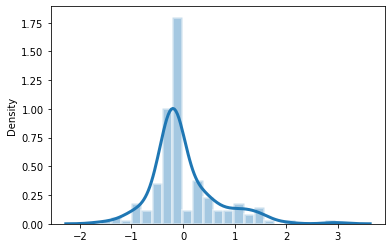

C:\Users\Albert\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


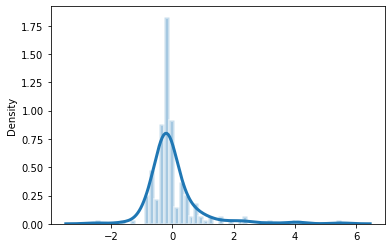

C:\Users\Albert\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


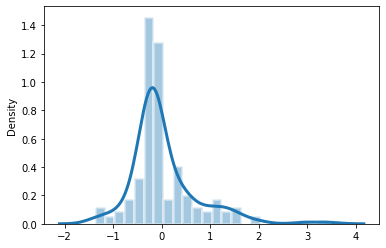

C:\Users\Albert\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


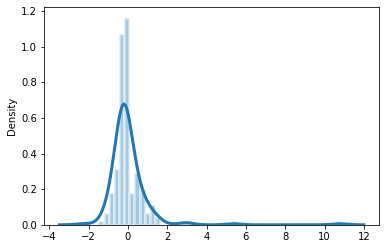

C:\Users\Albert\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


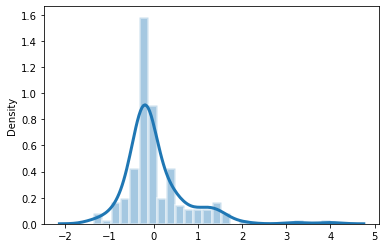

C:\Users\Albert\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


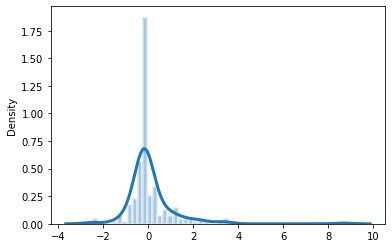

C:\Users\Albert\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


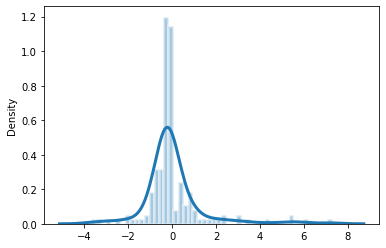

C:\Users\Albert\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


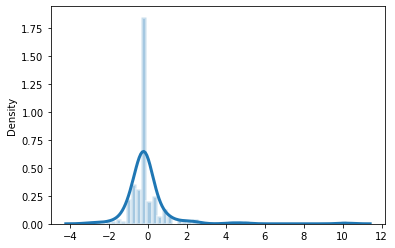

C:\Users\Albert\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


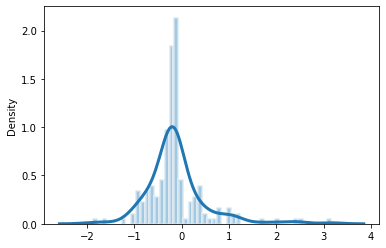

C:\Users\Albert\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


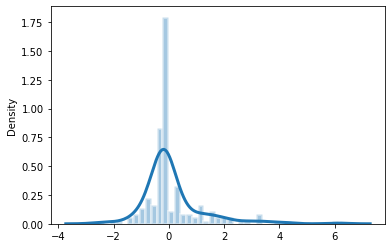

C:\Users\Albert\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


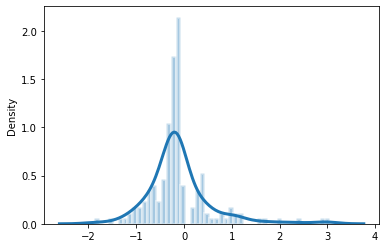

C:\Users\Albert\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


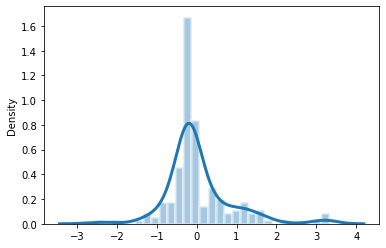

C:\Users\Albert\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


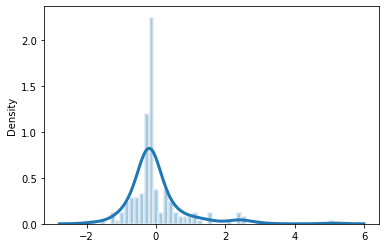

C:\Users\Albert\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


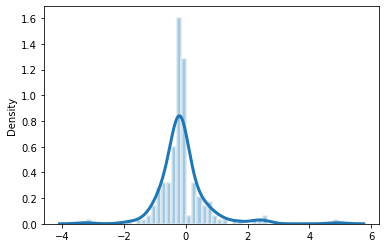

C:\Users\Albert\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


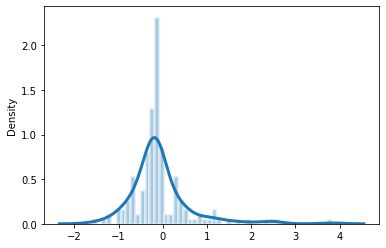

C:\Users\Albert\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


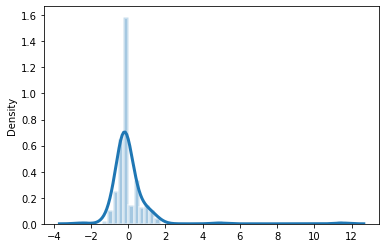

C:\Users\Albert\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


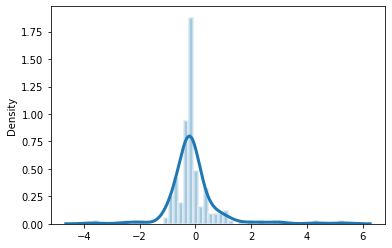

C:\Users\Albert\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


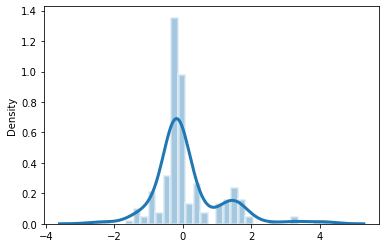

C:\Users\Albert\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


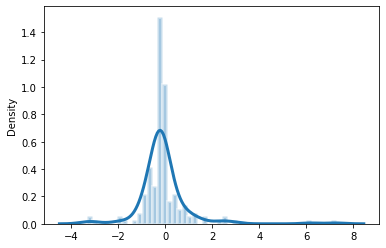

C:\Users\Albert\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


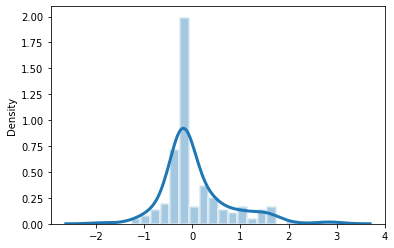

In [177]:
for i in X_filtered[:20]:
    sns.distplot(i, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})
    plt.show()

In [22]:
data = pd.concat([X, y], axis=1)
data

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                 
1       -0.220799 -0.207071     0.651256    -0.517023   1.050634   
2        0.460162 -0.091855    -0.071812     2.178881   0.156680   
3       -0.084607  0.073455     0.651256    -0.517023   0.984415   
4       -0.447787 -0.096864     0.651256    -0.517023  -1.862993   
5        0.641752  0.375020     1.374324    -0.517023   0.951306   
...           ...       ...          ...          ...        ...   
1456    -0.356992 -0.260471    -0.071812    -0.517023   0.918196   
1457     0.687149  0.266316    -0.071812     0.381612   0.222899   
1458    -0.175402 -0.147760     0.651256     3.077516  -1.002149   
1459    -0.084607 -0.080133    -0.794879     0.381612  -0.704164   
1460     0.233175 -0.058092    -0.794879     0.381612  -0.207523   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  \
Id                                                                 ...   
1         0.878367    0.513928    0.575228   -0.288554  -0.944267  ...   
2        -0.429430   -0.570555    1.171591   -0.288554  -0.641008  ...   
3         0.829930    0.325803    0.092875   -0.288554  -0.301540  ...   
4        -0.720051   -0.570555   -0.499103   -0.288554  -0.061648  ...   
5         0.733056    1.366021    0.463410   -0.288554  -0.174805  ...   
...            ...         ...         ...         ...        ...  ...   
1456      0.733056   -0.570555   -0.972685   -0.288554   0.873022  ...   
1457      0.151813    0.087881    0.759399    0.721865   0.049245  ...   
1458      1.023678   -0.570555   -0.369744   -0.288554   0.701025  ...   
1459      0.539309   -0.570555   -0.865252    6.090101  -1.283736  ...   
1460     -0.962236   -0.570555    0.847099    1.509123  -0.975951  ...   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
Id                                                              
1          -0.058601     -0.301858     -0.045361     0.390159   
2          -0.058601     -0.301858     -0.045361     0.390159   
3          -0.058601     -0.301858     -0.045361     0.390159   
4          -0.058601     -0.301858     -0.045361     0.390159   
5          -0.058601     -0.301858     -0.045361     0.390159   
...              ...           ...           ...          ...   
1456       -0.058601     -0.301858     -0.045361     0.390159   
1457       -0.058601     -0.301858     -0.045361     0.390159   
1458       -0.058601     -0.301858     -0.045361     0.390159   
1459       -0.058601     -0.301858     -0.045361     0.390159   
1460       -0.058601     -0.301858     -0.045361     0.390159   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
Id                                                                        
1                 -0.052396             -0.091003             -0.117811   
2                 -0.052396             -0.091003             -0.117811   
3                 -0.052396             -0.091003             -0.117811   
4                 -0.052396             -0.091003             -0.117811   
5                 -0.052396             -0.091003             -0.117811   
...                     ...                   ...                   ...   
1456              -0.052396             -0.091003             -0.117811   
1457              -0.052396             -0.091003             -0.117811   
1458              -0.052396             -0.091003             -0.117811   
1459              -0.052396             -0.091003             -0.117811   
1460              -0.052396             -0.091003             -0.117811   

      SaleCondition_Normal  SaleCondition_Partial  SalePrice  
Id                                                            
1                 0.467491               -0.30589   5.319106  
2                 0.467491               -0.30589   5.258877  
3                 0.467491               -0.30589   5.349278  
4                -2.1